In [57]:
from tqdm.auto import tqdm
import os
import pandas as pd
import csv
import pickle as pkl
import nltk
import matplotlib.pyplot as plt
import seaborn as sea
import re
import os
import spacy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

from tqdm.auto import tqdm
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import math
from itertools import chain

import gensim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
!wget https://dl.fbaipublicfiles.com/parlai/empatheticdialogues/empatheticdialogues.tar.gz
!tar xvf empatheticdialogues.tar.gz

--2020-12-06 08:58:41--  https://dl.fbaipublicfiles.com/parlai/empatheticdialogues/empatheticdialogues.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28022709 (27M) [application/gzip]
Saving to: ‘empatheticdialogues.tar.gz’

empatheticdialogues 100%[===================>]  26.72M  7.59MB/s    in 3.5s    

2020-12-06 08:58:45 (7.59 MB/s) - ‘empatheticdialogues.tar.gz’ saved [28022709/28022709]

empatheticdialogues/
empatheticdialogues/test.csv
empatheticdialogues/train.csv
empatheticdialogues/valid.csv


In [ ]:
def prepare_dataset(target_file):
  dataset_dir = os.path.join(os.getcwd(),'empatheticdialogues')

  examples = {}

  for file in tqdm(os.listdir(dataset_dir)):
    if file == target_file + '.csv':
      file_path = os.path.join(dataset_dir,file)
      return pd.read_csv(file_path,error_bad_lines=False)
    
    

In [1]:
train = prepare_dataset('train')
valid = prepare_dataset('valid')
test =  prepare_dataset('test')

NameError: ignored

In [ ]:
valid['positive_emotion'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Positive Emotion', 0), axis=1)
valid['negative_emotion'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Negative Emotion', 0), axis=1)
valid['wc'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Word Count', 0), axis=1)

test['positive_emotion'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Positive Emotion', 0), axis=1)
test['negative_emotion'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Negative Emotion', 0), axis=1)
test['wc'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Word Count', 0), axis=1)


In [ ]:
train['pronoun'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Total Pronouns', 0), axis=1)
train['pronoun_utter'] = train.apply(lambda x: wc.score_text(str(x['clean_utterance'])).get('Total_Pronouns', 0), axis=1)
#to print the dictionary of category scores (they are percentages of words)
train['work'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Work', 0), axis=1)
train['achievement'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Achievement', 0), axis=1)
train['leisure'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Leisure', 0), axis=1)
train['home'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Home', 0), axis=1)
train['religion'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Religion', 0), axis=1)
train['money'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Money', 0), axis=1)
train['death'] = train.apply(lambda x: wc.score_text(str(x['clean_prompt'])).get('Death', 0), axis=1)
#to print the dictionary of category scores (they are percentages of words)

print(train[["positive_emotion", "negative_emotion", "wc", "context"]])

In [72]:
with open("train_added_columns.csv", "r") as intrain: 
    train = pd.read_csv(intrain)
with open("valid_added_columns.csv", "r") as indev: 
    valid = pd.read_csv(indev)
with open("test_added_columns.csv", "r") as intest: 
    test = pd.read_csv(intest)
print(train)

                    conv_id  utterance_idx  ... Sleeping Grooming
0              hit:0_conv:1              1  ...        0        0
1              hit:0_conv:1              2  ...        0        0
2              hit:0_conv:1              3  ...        0        0
3              hit:0_conv:1              4  ...        0        0
4              hit:0_conv:1              5  ...        0        0
...                     ...            ...  ...      ...      ...
76663  hit:12424_conv:24848              5  ...        0        0
76664  hit:12424_conv:24849              1  ...        0        0
76665  hit:12424_conv:24849              2  ...        0        0
76666  hit:12424_conv:24849              3  ...        0        0
76667  hit:12424_conv:24849              4  ...        0        0

[76668 rows x 102 columns]


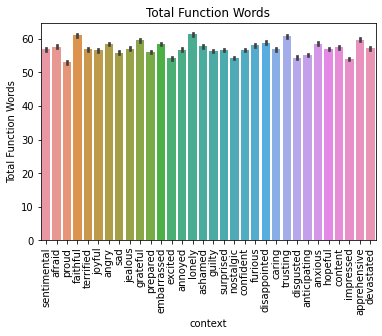

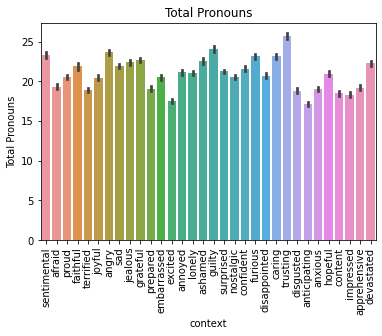

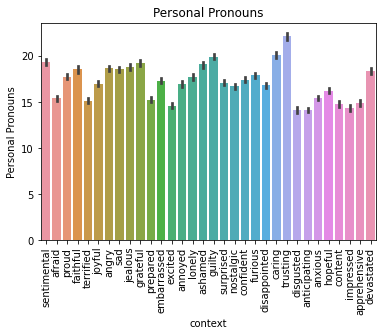

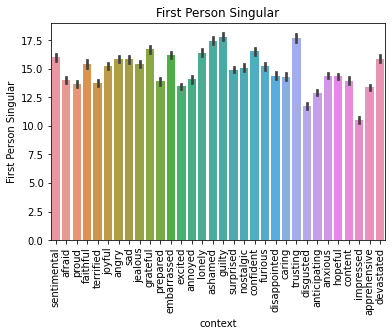

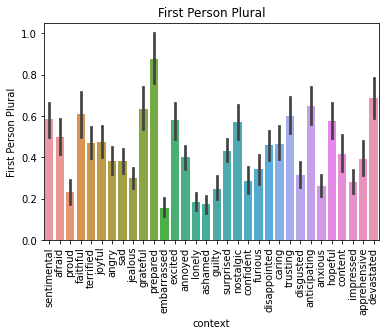

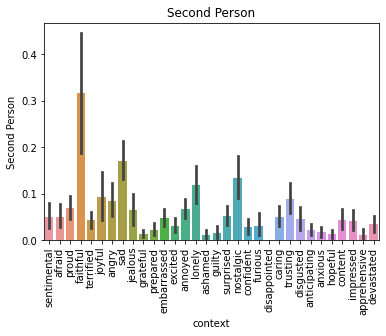

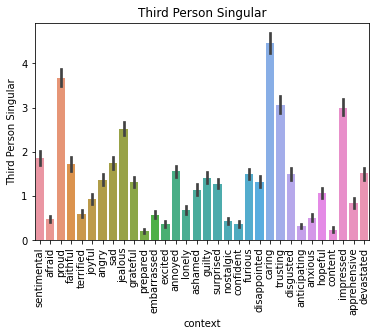

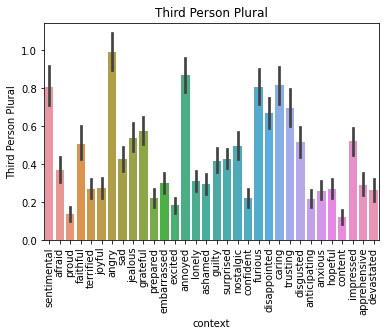

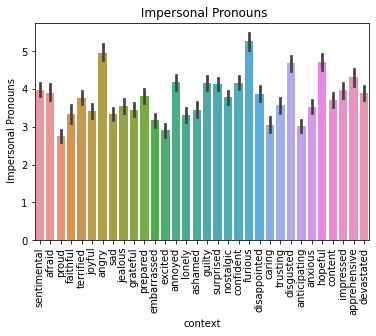

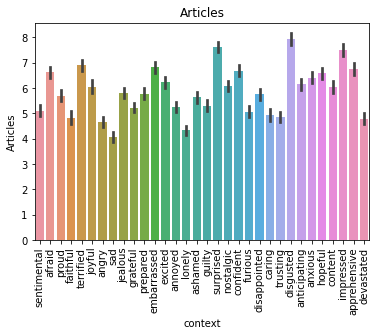

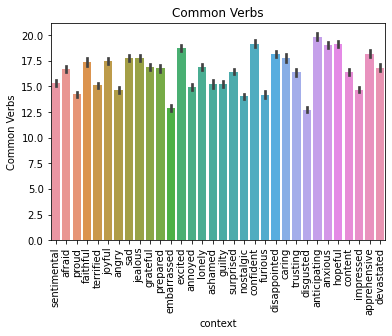

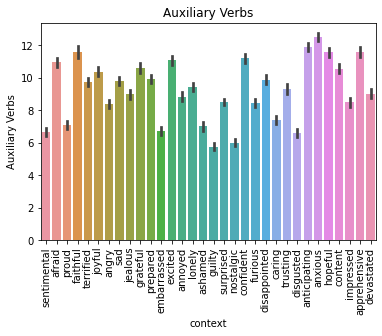

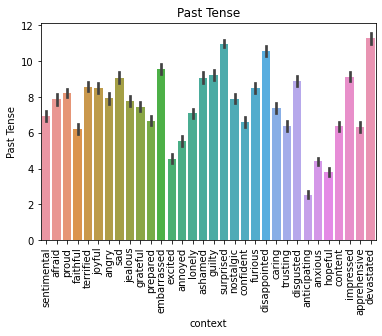

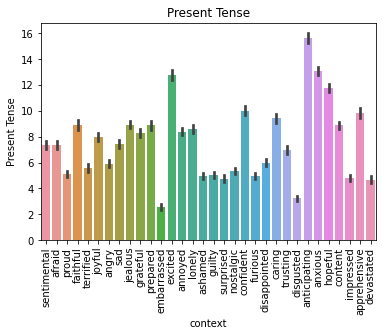

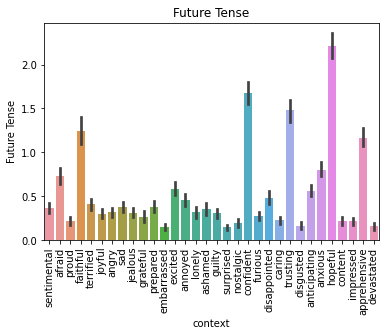

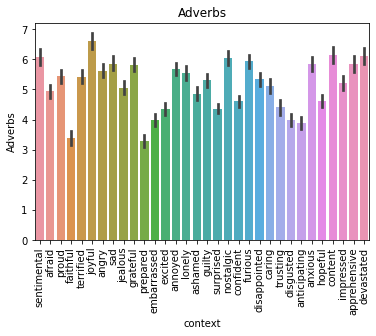

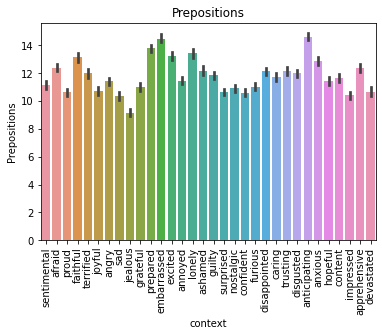

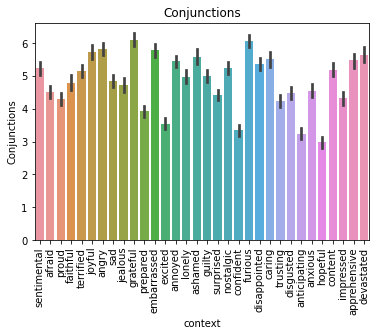

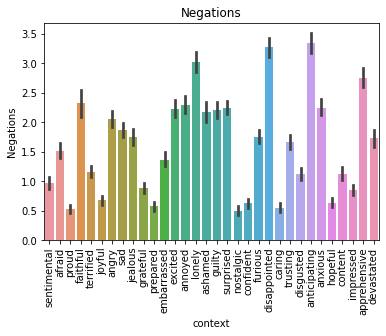

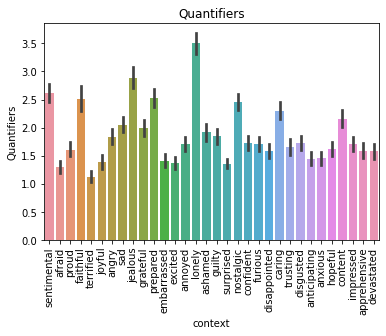

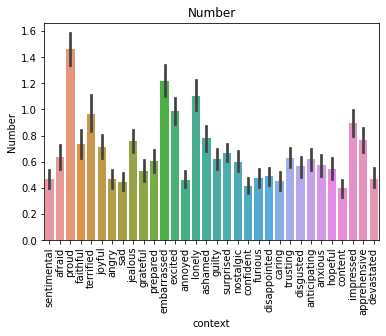

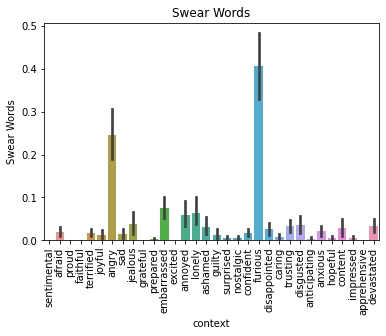

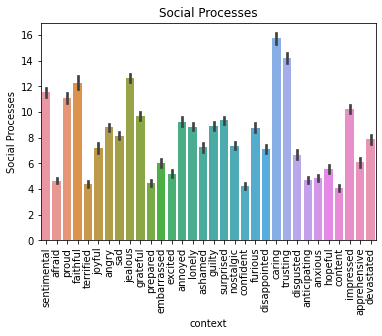

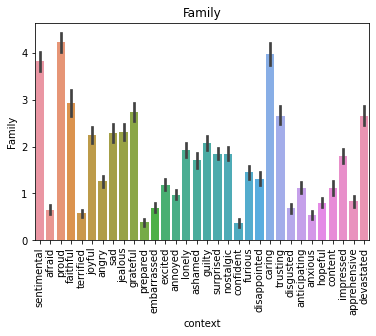

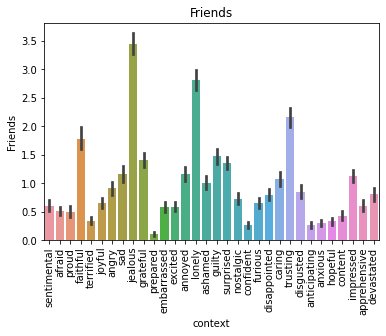

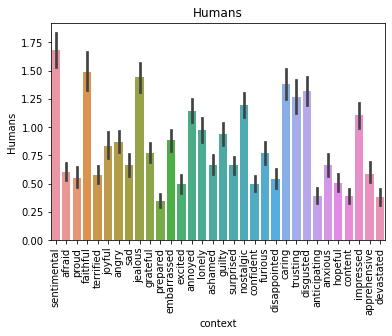

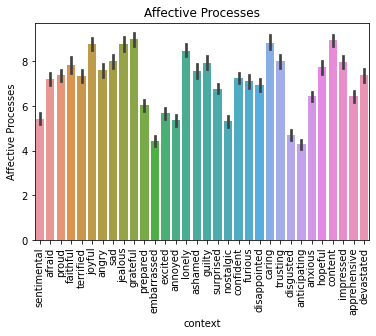

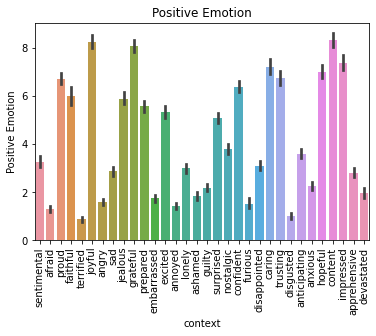

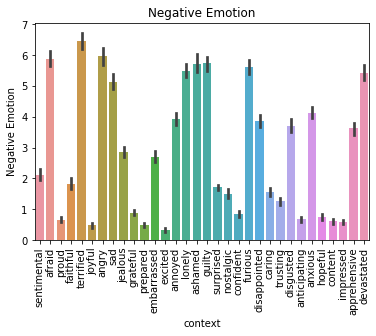

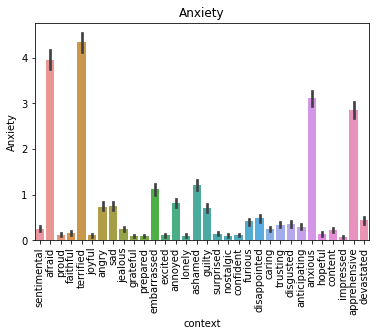

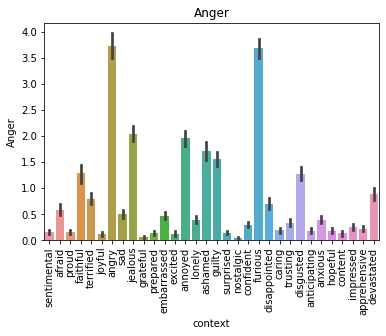

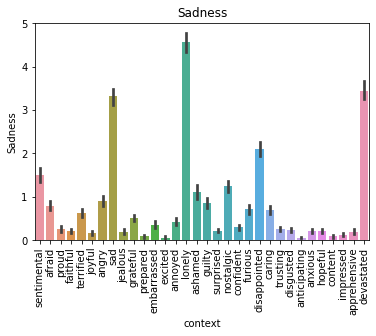

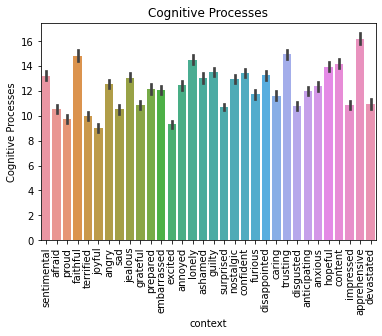

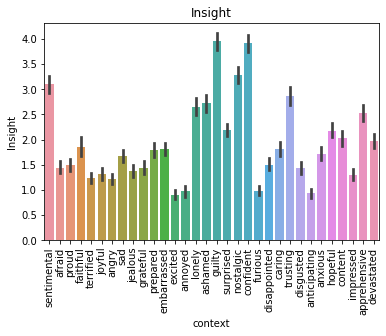

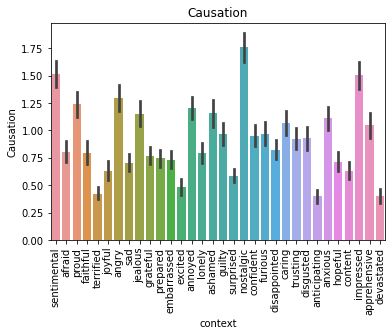

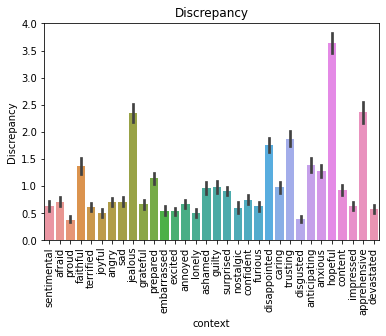

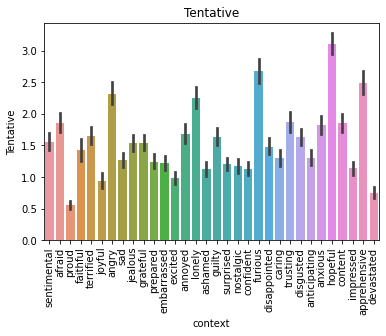

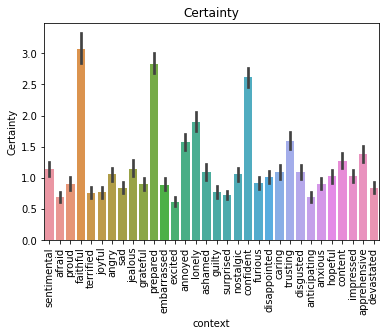

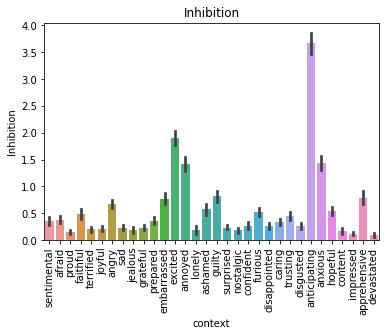

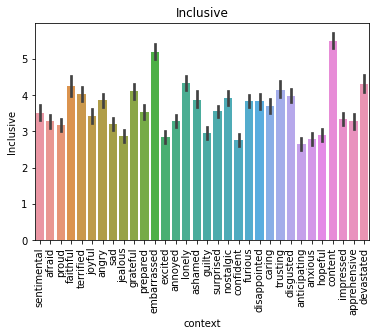

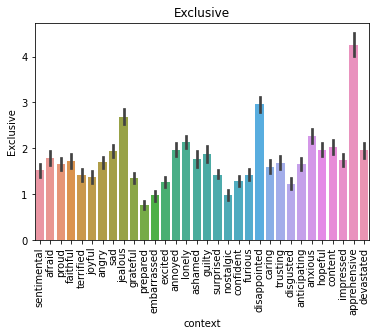

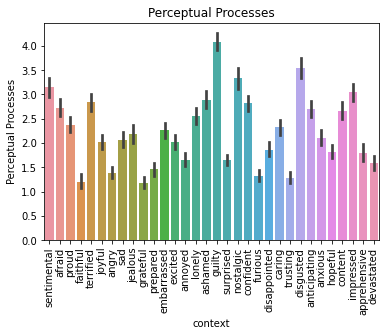

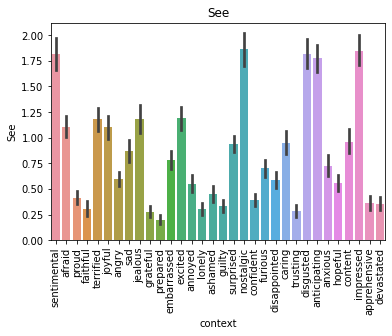

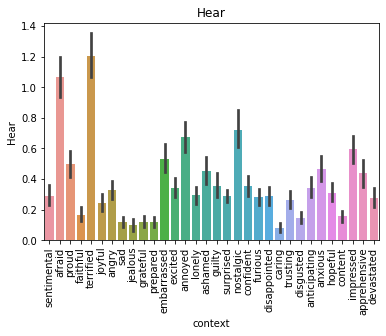

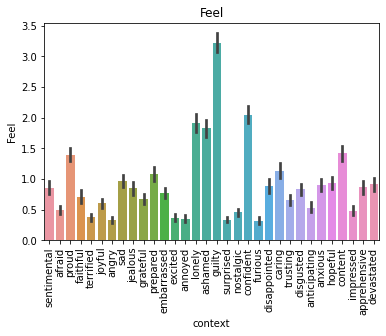

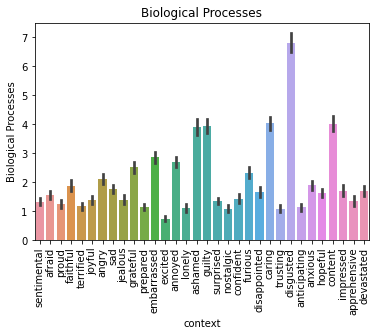

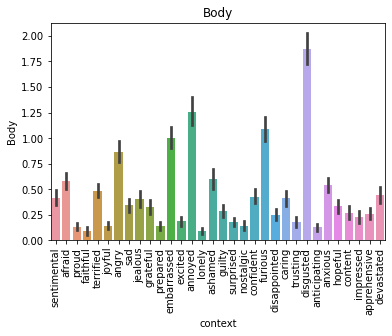

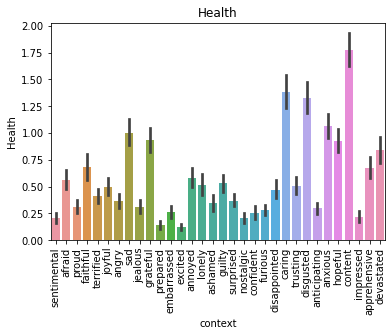

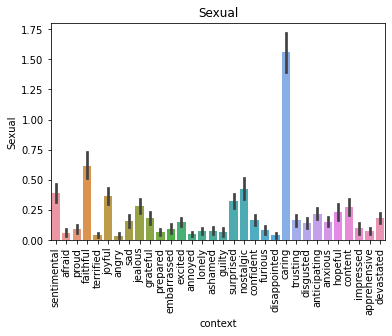

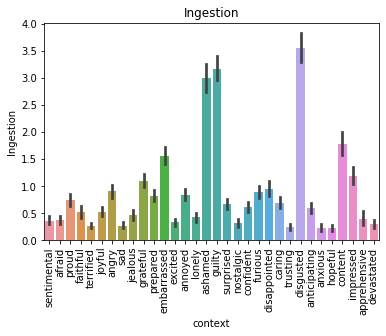

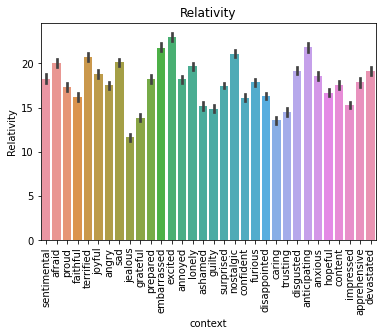

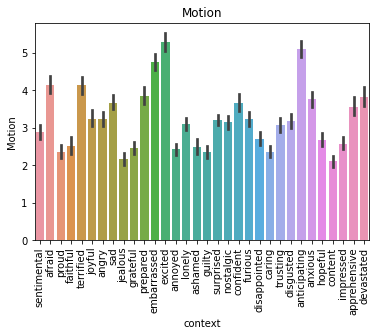

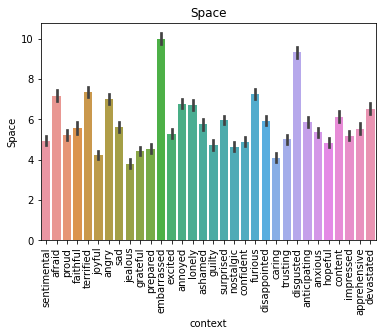

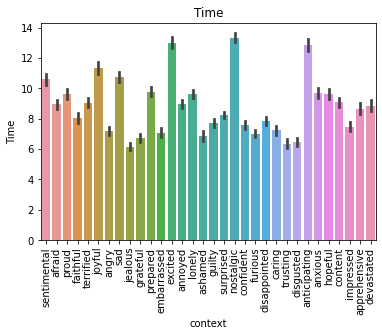

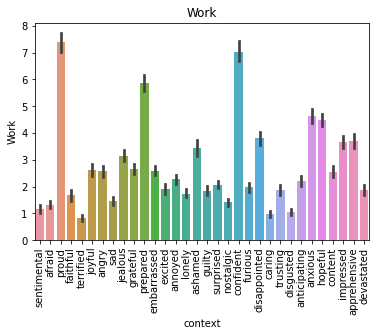

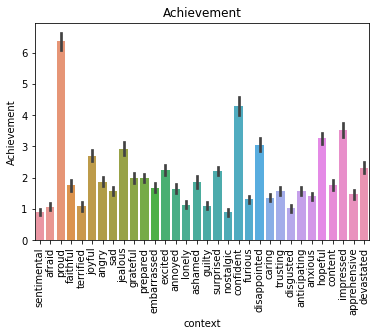

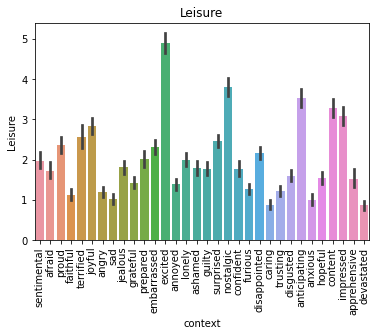

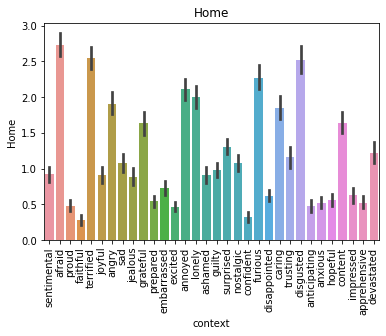

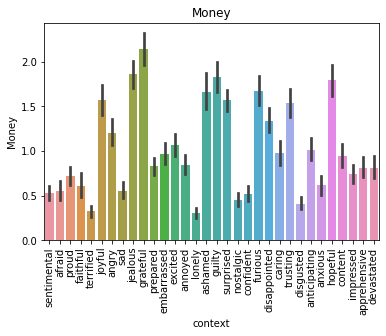

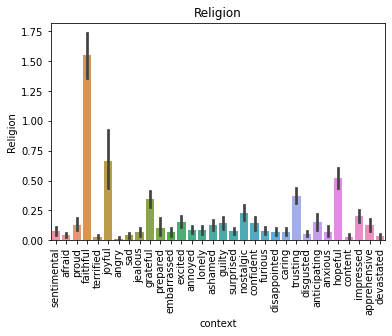

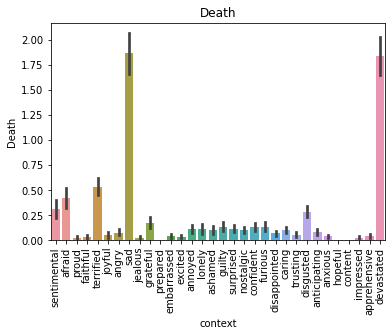

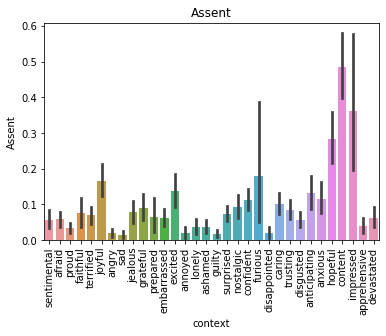

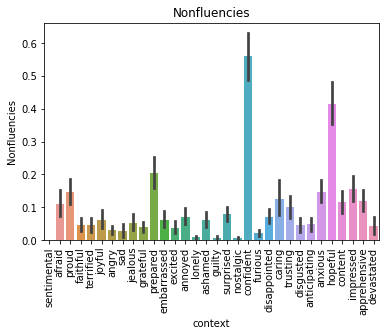

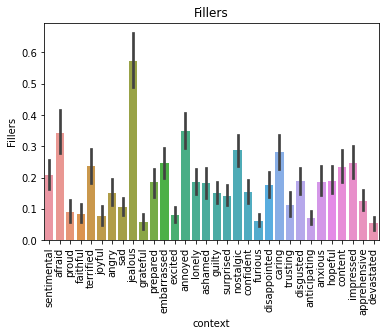

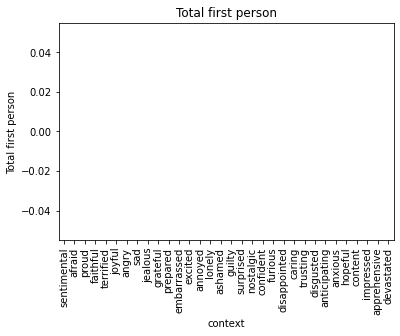

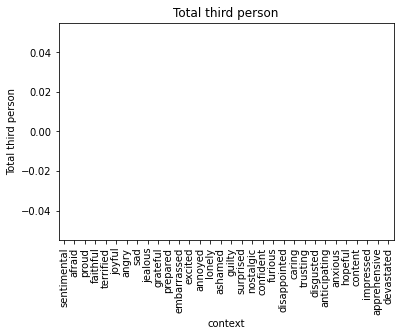

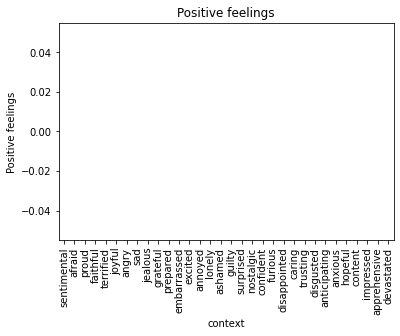

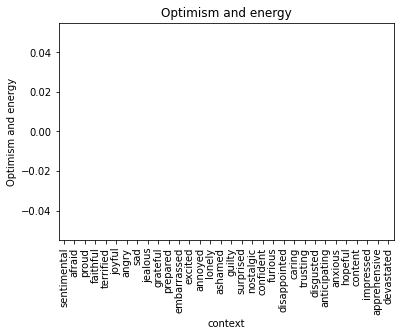

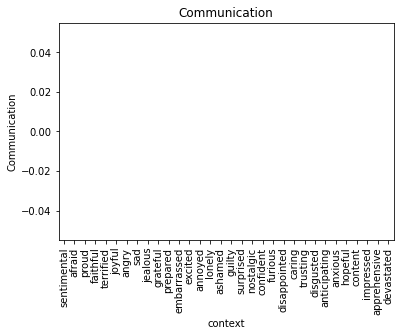

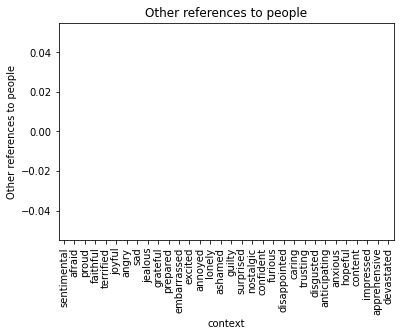

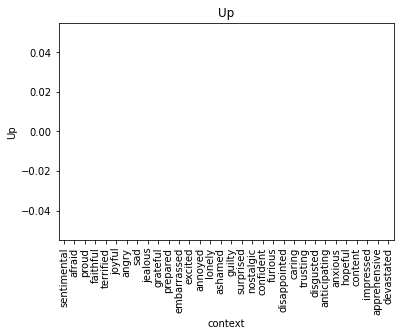

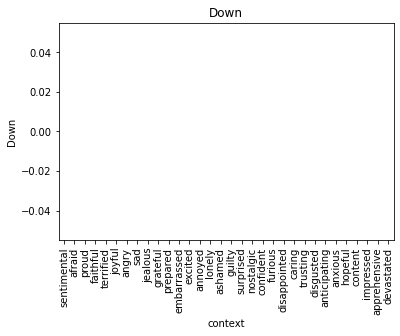

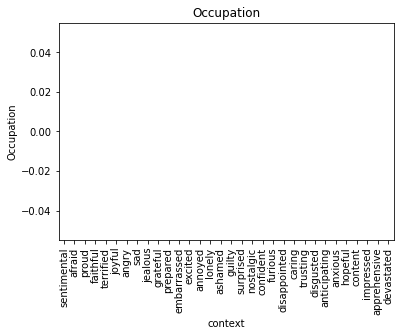

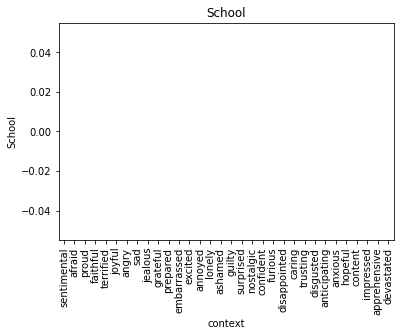

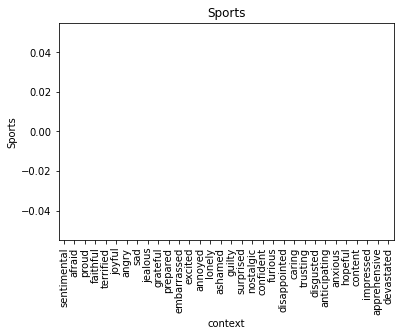

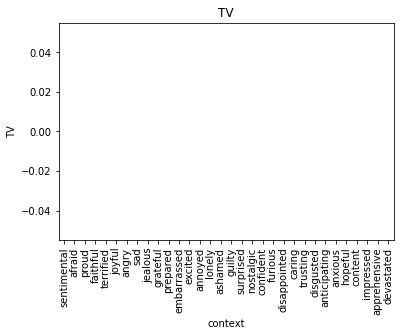

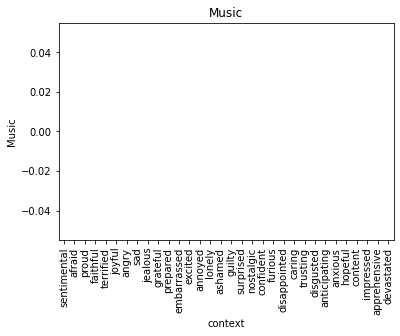

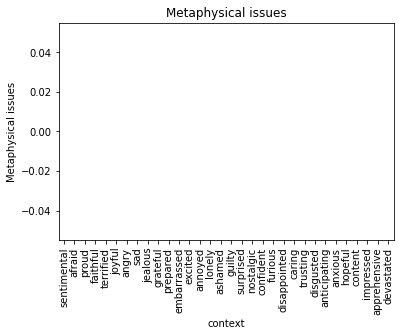

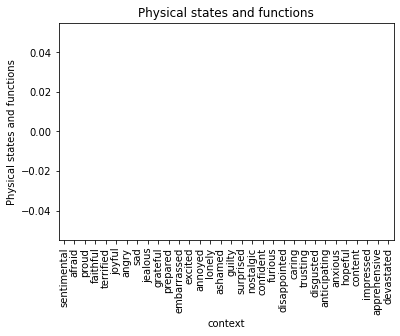

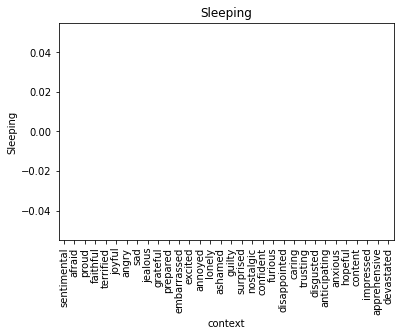

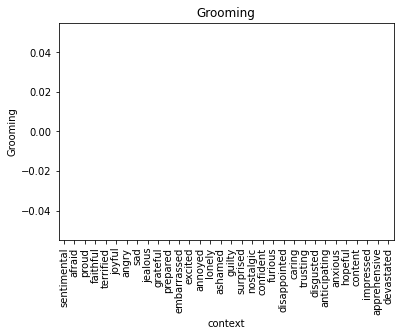

['Total Function Words', 'Total Pronouns', 'Personal Pronouns', 'First Person Singular', 'First Person Plural', 'Second Person', 'Third Person Singular', 'Third Person Plural', ' Impersonal Pronouns', 'Articles', 'Common Verbs', 'Auxiliary Verbs', 'Past Tense', 'Present Tense', 'Future Tense', 'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers', 'Number', 'Swear Words', 'Social Processes', 'Family', 'Friends', 'Humans', 'Affective Processes', 'Positive Emotion', 'Negative Emotion', 'Anxiety', 'Anger', 'Sadness', 'Cognitive Processes', 'Insight', 'Causation', 'Discrepancy', 'Tentative', 'Certainty', 'Inhibition', 'Inclusive', 'Exclusive', 'Perceptual Processes', 'See', 'Hear', 'Feel', 'Biological Processes', 'Body', 'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space', 'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion', 'Death', 'Assent', 'Nonfluencies', 'Fillers', 'Total first person', 'Total third person', 'Positive feelings', 'Optimism

In [ ]:
_liwc_categories = [
          ('Total Function Words', 1, 'funct', None, None),
          ('Total Pronouns', 2, 'pronoun', 1, 'pronoun'),
          ('Personal Pronouns', 3, 'ppron', None, None),
          ('First Person Singular', 4, 'i', 2, 'i'),
          ('First Person Plural', 5, 'we', 3, 'we'),
          ('Second Person', 6, 'you', 5, 'you'),
          ('Third Person Singular', 7, 'shehe', None, None),
          ('Third Person Plural', 8, 'they', None, None),
          (' Impersonal Pronouns', 9, 'ipron', None, None),
          ('Articles', 10, 'article', 9, 'article'),
          ('Common Verbs', 11, 'verb', None, None),
          ('Auxiliary Verbs', 12, 'auxverb', None, None),
          ('Past Tense', 13, 'past', 38, 'past'),
          ('Present Tense', 14, 'present', 39, 'present'),
          ('Future Tense', 15, 'future', 40, 'future'),
          ('Adverbs', 16, 'adverb', None, None),
          ('Prepositions', 17, 'preps', 10, 'preps'),
          ('Conjunctions', 18, 'conj', None, None),
          ('Negations', 19, 'negate', 7, 'negate'),
          ('Quantifiers', 20, 'quant', None, None),
          ('Number', 21, 'number', 11, 'number'),
          ('Swear Words', 22, 'swear', 66, 'swear'),
          ('Social Processes', 121, 'social', 31, 'social'),
          ('Family', 122, 'family', 35, 'family'),
          ('Friends', 123, 'friend', 34, 'friends'),
          ('Humans', 124, 'humans', 36, 'humans'),
          ('Affective Processes', 125, 'affect', 12, 'affect'),
          ('Positive Emotion', 126, 'posemo', 13, 'posemo'),
          ('Negative Emotion', 127, 'negemo', 16, 'negemo'),
          ('Anxiety', 128, 'anx', 17, 'anx'),
          ('Anger', 129, 'anger', 18, 'anger'),
          ('Sadness', 130, 'sad', 19, 'sad'),
          ('Cognitive Processes', 131, 'cogmech', 20, 'cogmech'),
          ('Insight', 132, 'insight', 22, 'insight'),
          ('Causation', 133, 'cause', 21, 'cause'),
          ('Discrepancy', 134, 'discrep', 23, 'discrep'),
          ('Tentative', 135, 'tentat', 25, 'tentat'),
          ('Certainty', 136, 'certain', 26, 'certain'),
          ('Inhibition', 137, 'inhib', 24, 'inhib'),
          ('Inclusive', 138, 'incl', 44, 'incl'),
          ('Exclusive', 139, 'excl', 45, 'excl'),
          ('Perceptual Processes', 140, 'percept', 27, 'senses'),
          ('See', 141, 'see', 28, 'see'),
          ('Hear', 142, 'hear', 29, 'hear'),
          ('Feel', 143, 'feel', 30, 'feel'),
          ('Biological Processes', 146, 'bio', None, None),
          ('Body', 147, 'body', 61, 'body'),
          ('Health', 148, 'health', None, None),
          ('Sexual', 149, 'sexual', 62, 'sexual'),
          ('Ingestion', 150, 'ingest', 63, 'eating'),
          ('Relativity', 250, 'relativ', None, None),
          ('Motion', 251, 'motion', 46, 'motion'),
          ('Space', 252, 'space', 41, 'space'),
          ('Time', 253, 'time', 37, 'time'),
          ('Work', 354, 'work', 49, 'job'),
          ('Achievement', 355, 'achieve', 50, 'achieve'),
          ('Leisure', 356, 'leisure', 51, 'leisure'),
          ('Home', 357, 'home', 52, 'home'),
          ('Money', 358, 'money', 56, 'money'),
          ('Religion', 359, 'relig', 58, 'relig'),
          ('Death', 360, 'death', 59, 'death'),
          ('Assent', 462, 'assent', 8, 'assent'),
          ('Nonfluencies', 463, 'nonfl', 67, 'nonfl'),
          ('Fillers', 464, 'filler', 68, 'fillers'),
          ('Total first person', None, None, 4, 'self'),
          ('Total third person', None, None, 6, 'other'),
          ('Positive feelings', None, None, 14, 'posfeel'),
          ('Optimism and energy', None, None, 15, 'optim'),
          ('Communication', None, None, 32, 'comm'),
          ('Other references to people', None, None, 33, 'othref'),
          ('Up', None, None, 42, 'up'),
          ('Down', None, None, 43, 'down'),
          ('Occupation', None, None, 47, 'occup'),
          ('School', None, None, 48, 'school'),
          ('Sports', None, None, 53, 'sports'),
          ('TV', None, None, 54, 'tv'),
          ('Music', None, None, 55, 'music'),
          ('Metaphysical issues', None, None, 57, 'metaph'),
          ('Physical states and functions', None, None, 60, 'physcal'),
          ('Sleeping', None, None, 64, 'sleep'),
          ('Grooming', None, None, 65, 'groom')]
cat = []
for i in _liwc_categories:    
    sea.barplot(x="context", y=i[0], data=train)
    plt.xticks(rotation = 90)
    plt.title(i[0])
    plt.show()
    cat.append(i[0])
print(cat)

In [ ]:
print(len(train.columns))
for i in train.columns: 
  if i not in valid.columns: 
    print(i)

102
positive_emotion_utter
negative_emotion_utter
wc_utter
pronoun
pronoun_utter
work


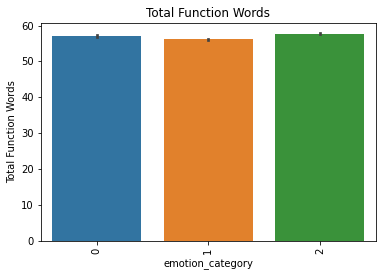

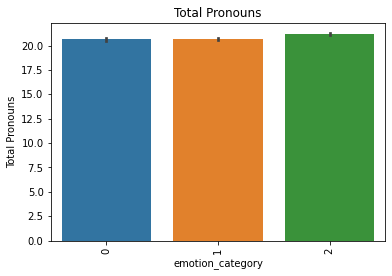

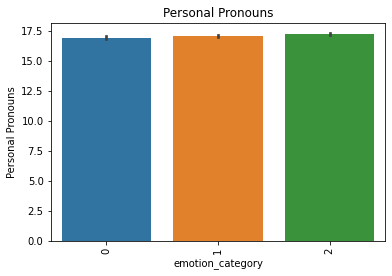

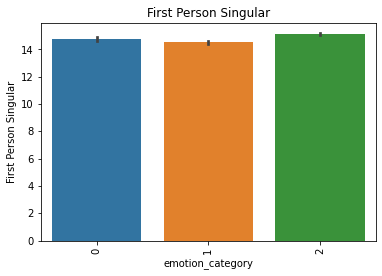

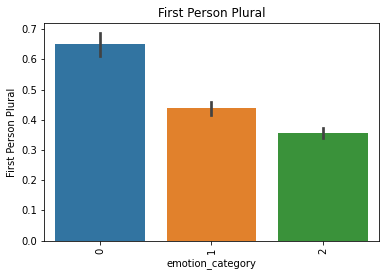

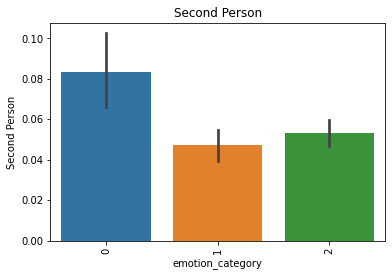

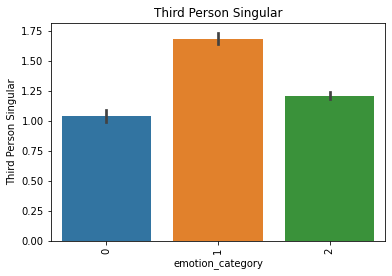

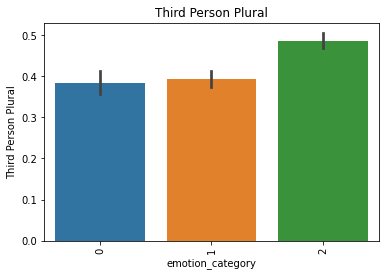

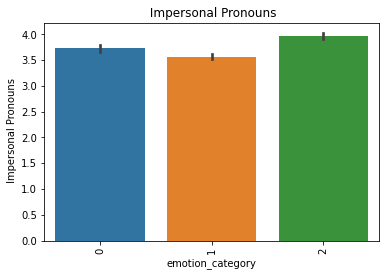

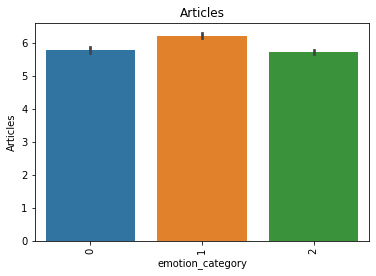

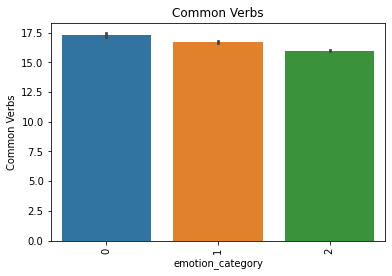

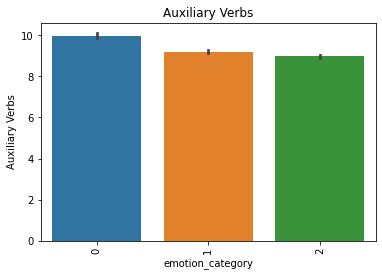

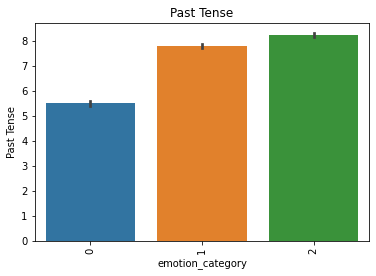

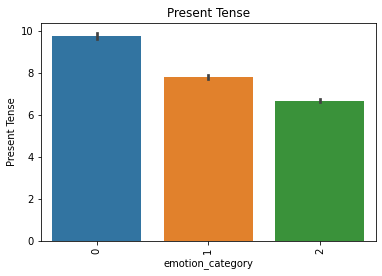

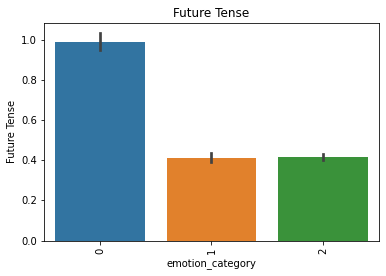

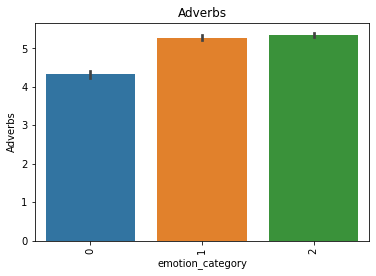

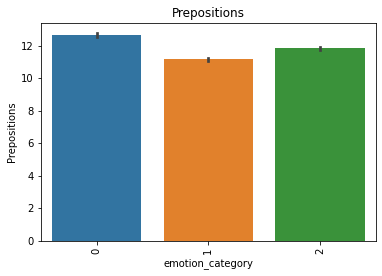

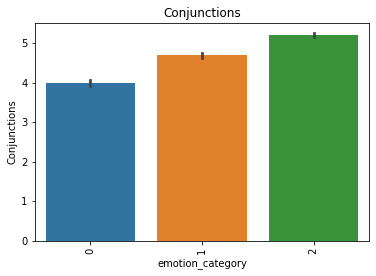

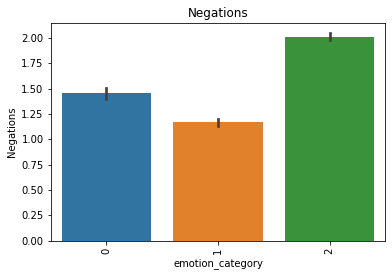

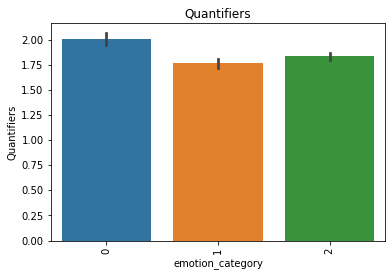

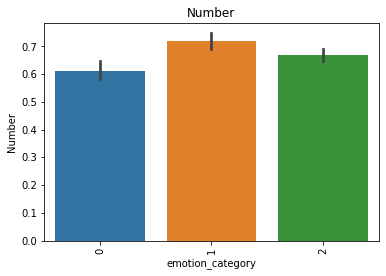

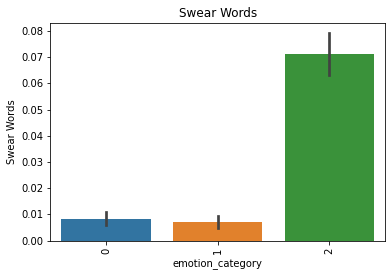

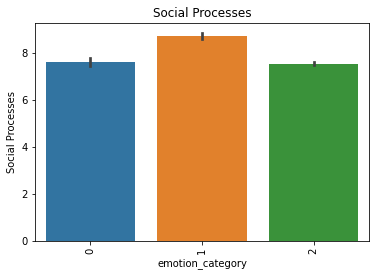

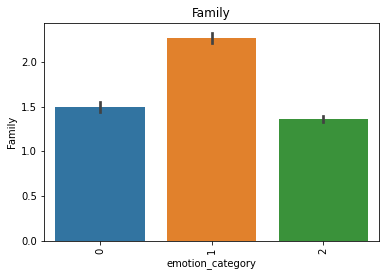

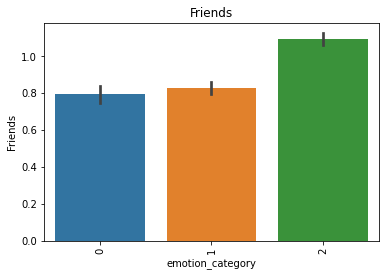

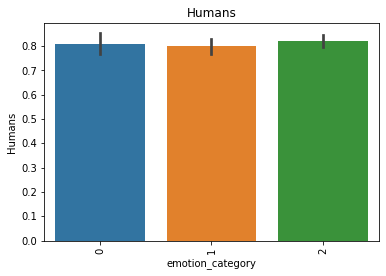

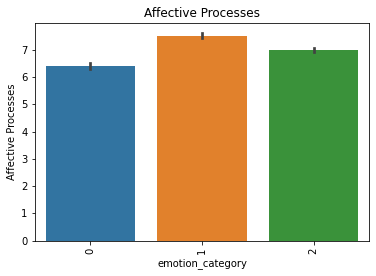

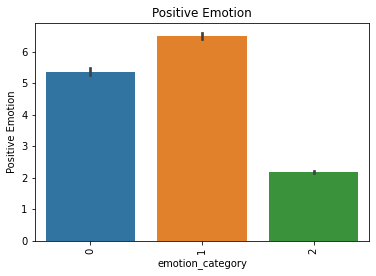

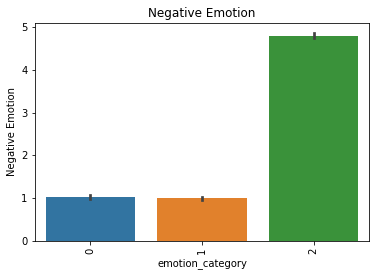

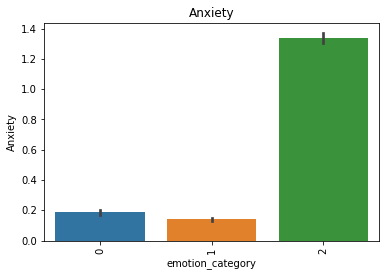

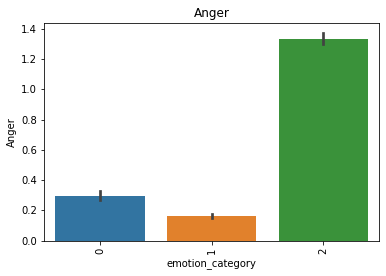

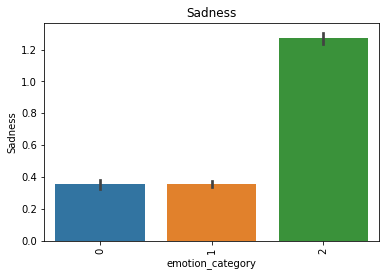

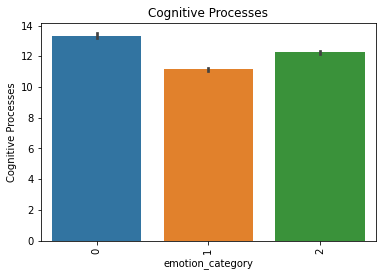

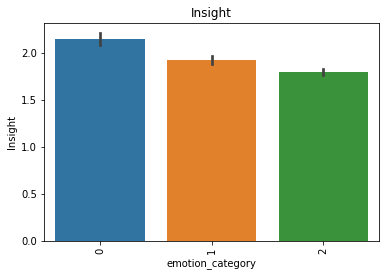

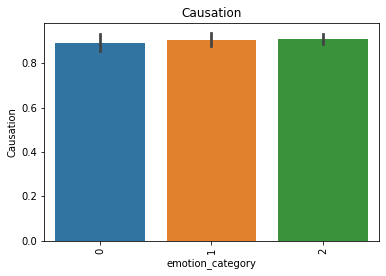

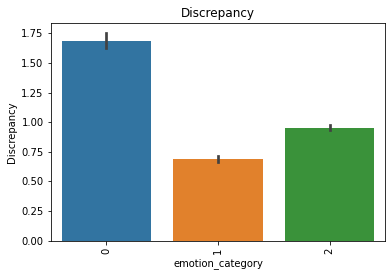

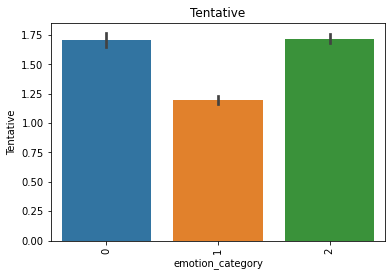

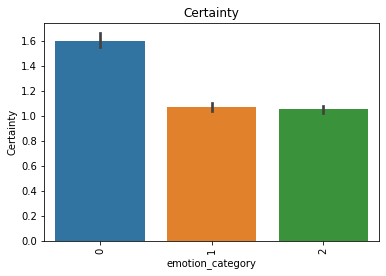

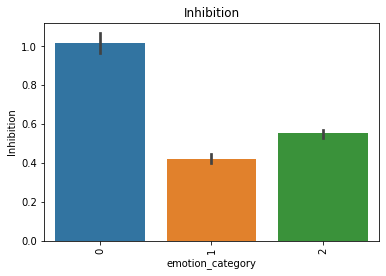

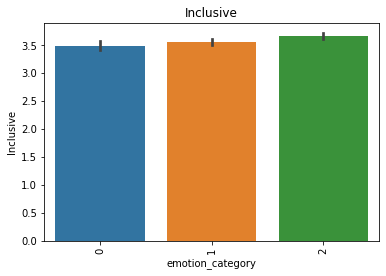

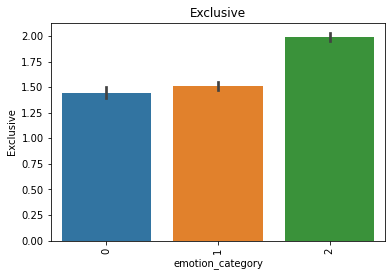

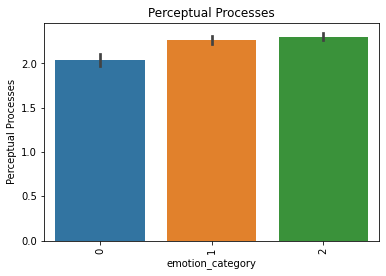

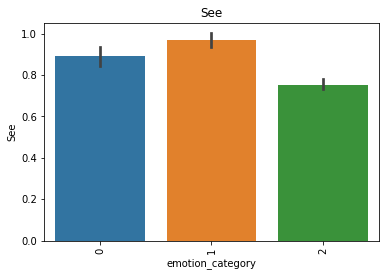

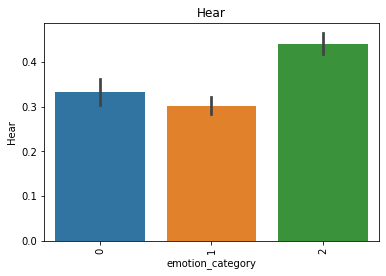

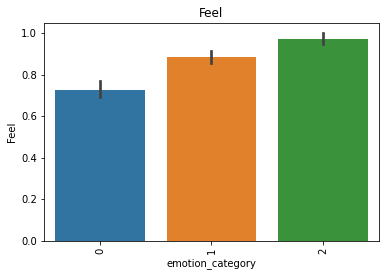

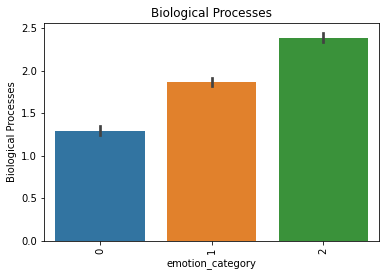

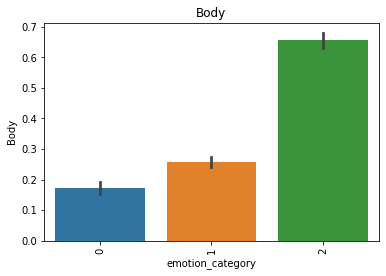

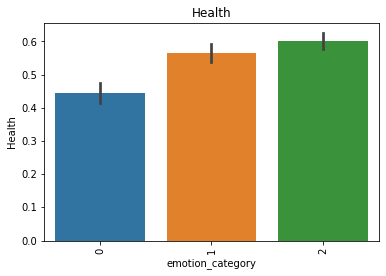

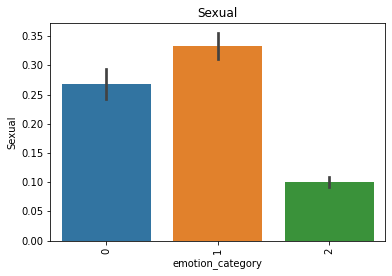

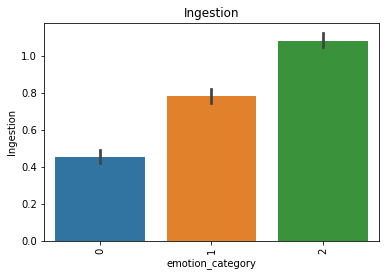

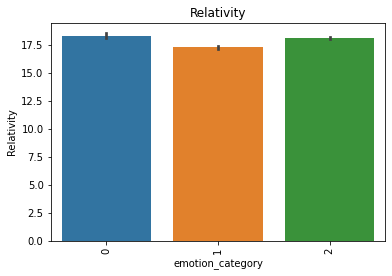

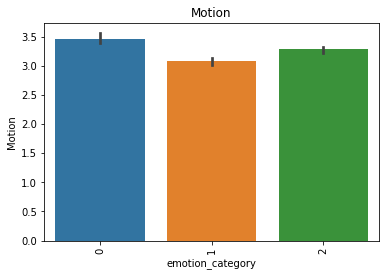

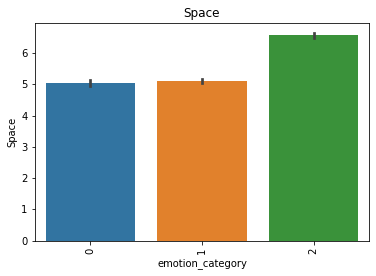

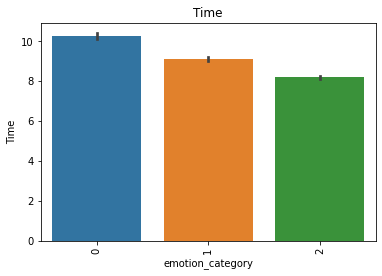

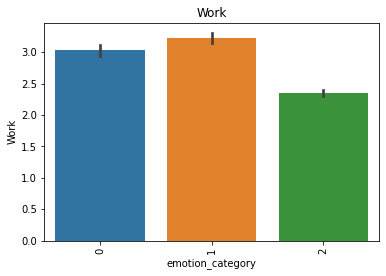

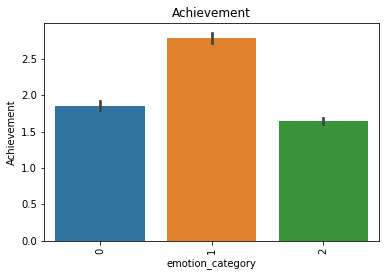

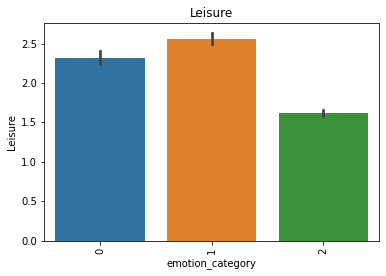

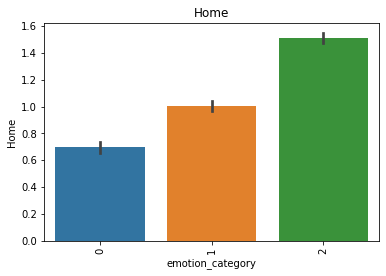

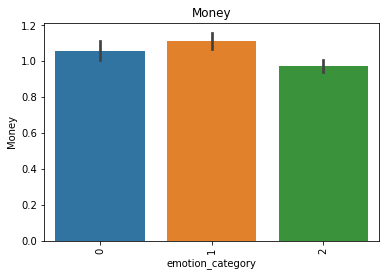

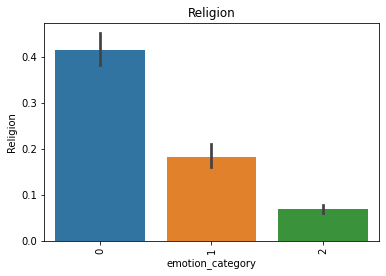

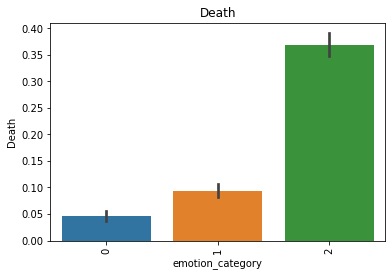

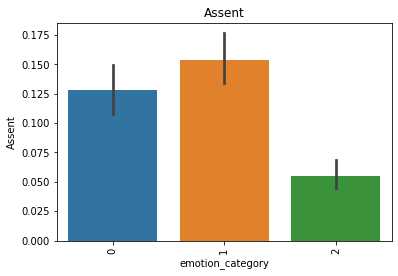

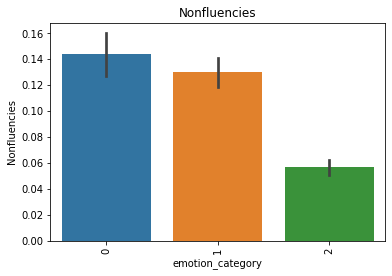

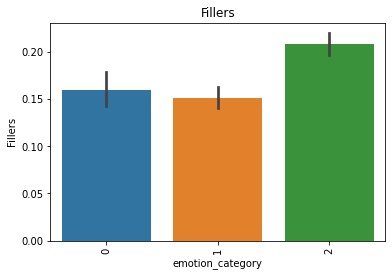

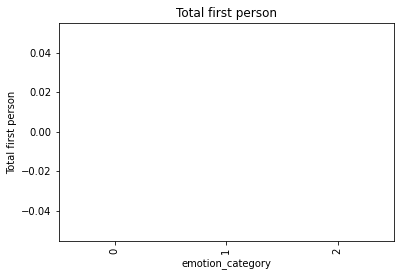

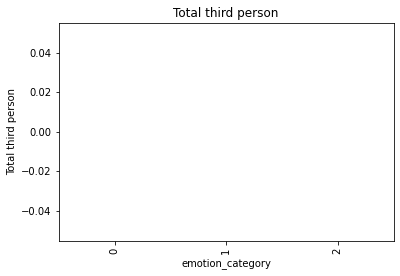

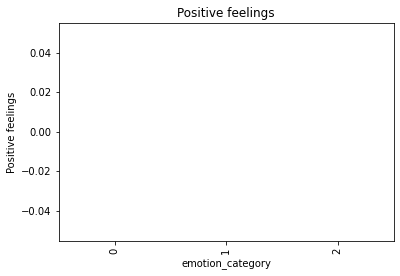

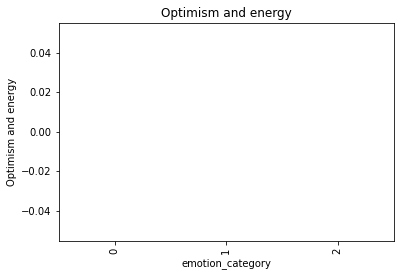

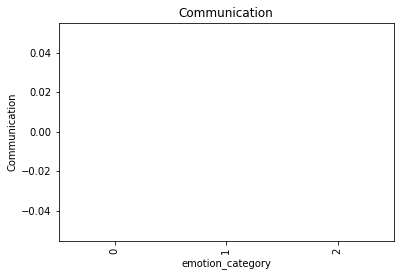

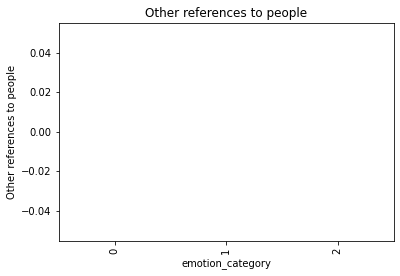

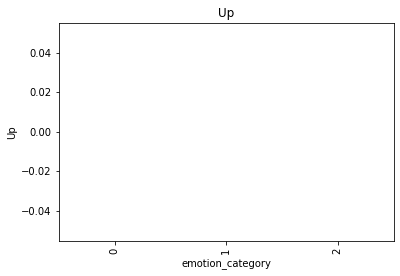

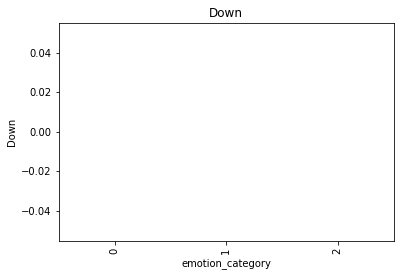

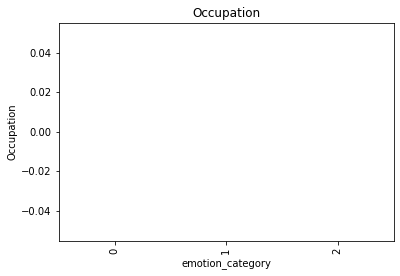

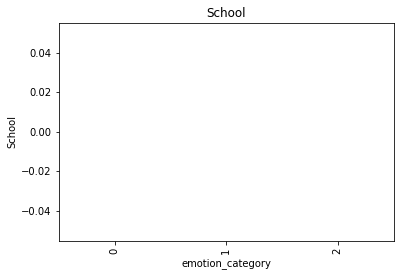

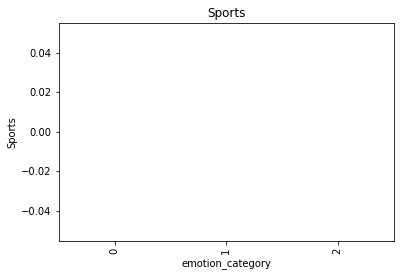

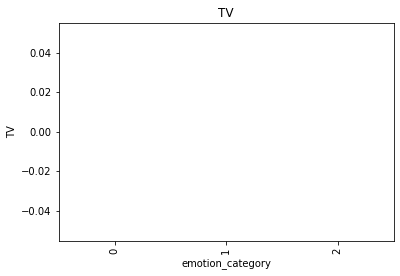

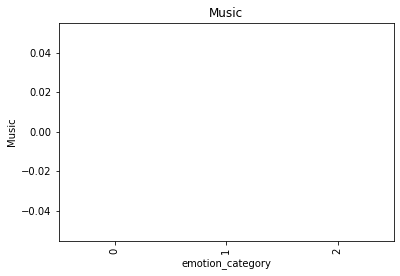

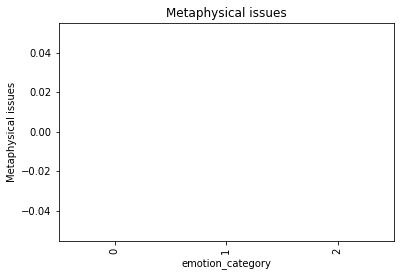

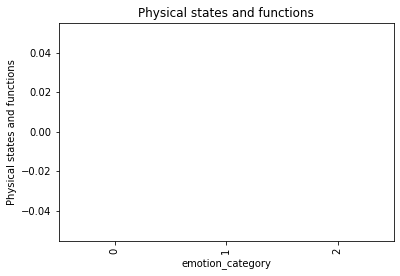

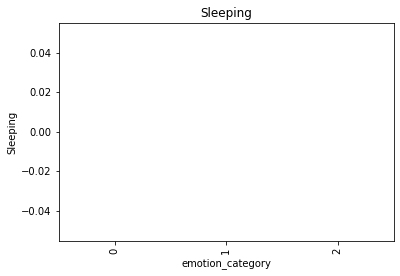

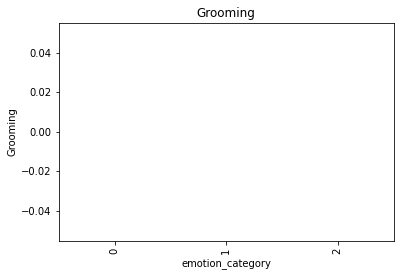

['Total Function Words', 'Total Pronouns', 'Personal Pronouns', 'First Person Singular', 'First Person Plural', 'Second Person', 'Third Person Singular', 'Third Person Plural', ' Impersonal Pronouns', 'Articles', 'Common Verbs', 'Auxiliary Verbs', 'Past Tense', 'Present Tense', 'Future Tense', 'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers', 'Number', 'Swear Words', 'Social Processes', 'Family', 'Friends', 'Humans', 'Affective Processes', 'Positive Emotion', 'Negative Emotion', 'Anxiety', 'Anger', 'Sadness', 'Cognitive Processes', 'Insight', 'Causation', 'Discrepancy', 'Tentative', 'Certainty', 'Inhibition', 'Inclusive', 'Exclusive', 'Perceptual Processes', 'See', 'Hear', 'Feel', 'Biological Processes', 'Body', 'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space', 'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion', 'Death', 'Assent', 'Nonfluencies', 'Fillers', 'Total first person', 'Total third person', 'Positive feelings', 'Optimism

In [ ]:
_liwc_categories = [
          ('Total Function Words', 1, 'funct', None, None),
          ('Total Pronouns', 2, 'pronoun', 1, 'pronoun'),
          ('Personal Pronouns', 3, 'ppron', None, None),
          ('First Person Singular', 4, 'i', 2, 'i'),
          ('First Person Plural', 5, 'we', 3, 'we'),
          ('Second Person', 6, 'you', 5, 'you'),
          ('Third Person Singular', 7, 'shehe', None, None),
          ('Third Person Plural', 8, 'they', None, None),
          (' Impersonal Pronouns', 9, 'ipron', None, None),
          ('Articles', 10, 'article', 9, 'article'),
          ('Common Verbs', 11, 'verb', None, None),
          ('Auxiliary Verbs', 12, 'auxverb', None, None),
          ('Past Tense', 13, 'past', 38, 'past'),
          ('Present Tense', 14, 'present', 39, 'present'),
          ('Future Tense', 15, 'future', 40, 'future'),
          ('Adverbs', 16, 'adverb', None, None),
          ('Prepositions', 17, 'preps', 10, 'preps'),
          ('Conjunctions', 18, 'conj', None, None),
          ('Negations', 19, 'negate', 7, 'negate'),
          ('Quantifiers', 20, 'quant', None, None),
          ('Number', 21, 'number', 11, 'number'),
          ('Swear Words', 22, 'swear', 66, 'swear'),
          ('Social Processes', 121, 'social', 31, 'social'),
          ('Family', 122, 'family', 35, 'family'),
          ('Friends', 123, 'friend', 34, 'friends'),
          ('Humans', 124, 'humans', 36, 'humans'),
          ('Affective Processes', 125, 'affect', 12, 'affect'),
          ('Positive Emotion', 126, 'posemo', 13, 'posemo'),
          ('Negative Emotion', 127, 'negemo', 16, 'negemo'),
          ('Anxiety', 128, 'anx', 17, 'anx'),
          ('Anger', 129, 'anger', 18, 'anger'),
          ('Sadness', 130, 'sad', 19, 'sad'),
          ('Cognitive Processes', 131, 'cogmech', 20, 'cogmech'),
          ('Insight', 132, 'insight', 22, 'insight'),
          ('Causation', 133, 'cause', 21, 'cause'),
          ('Discrepancy', 134, 'discrep', 23, 'discrep'),
          ('Tentative', 135, 'tentat', 25, 'tentat'),
          ('Certainty', 136, 'certain', 26, 'certain'),
          ('Inhibition', 137, 'inhib', 24, 'inhib'),
          ('Inclusive', 138, 'incl', 44, 'incl'),
          ('Exclusive', 139, 'excl', 45, 'excl'),
          ('Perceptual Processes', 140, 'percept', 27, 'senses'),
          ('See', 141, 'see', 28, 'see'),
          ('Hear', 142, 'hear', 29, 'hear'),
          ('Feel', 143, 'feel', 30, 'feel'),
          ('Biological Processes', 146, 'bio', None, None),
          ('Body', 147, 'body', 61, 'body'),
          ('Health', 148, 'health', None, None),
          ('Sexual', 149, 'sexual', 62, 'sexual'),
          ('Ingestion', 150, 'ingest', 63, 'eating'),
          ('Relativity', 250, 'relativ', None, None),
          ('Motion', 251, 'motion', 46, 'motion'),
          ('Space', 252, 'space', 41, 'space'),
          ('Time', 253, 'time', 37, 'time'),
          ('Work', 354, 'work', 49, 'job'),
          ('Achievement', 355, 'achieve', 50, 'achieve'),
          ('Leisure', 356, 'leisure', 51, 'leisure'),
          ('Home', 357, 'home', 52, 'home'),
          ('Money', 358, 'money', 56, 'money'),
          ('Religion', 359, 'relig', 58, 'relig'),
          ('Death', 360, 'death', 59, 'death'),
          ('Assent', 462, 'assent', 8, 'assent'),
          ('Nonfluencies', 463, 'nonfl', 67, 'nonfl'),
          ('Fillers', 464, 'filler', 68, 'fillers'),
          ('Total first person', None, None, 4, 'self'),
          ('Total third person', None, None, 6, 'other'),
          ('Positive feelings', None, None, 14, 'posfeel'),
          ('Optimism and energy', None, None, 15, 'optim'),
          ('Communication', None, None, 32, 'comm'),
          ('Other references to people', None, None, 33, 'othref'),
          ('Up', None, None, 42, 'up'),
          ('Down', None, None, 43, 'down'),
          ('Occupation', None, None, 47, 'occup'),
          ('School', None, None, 48, 'school'),
          ('Sports', None, None, 53, 'sports'),
          ('TV', None, None, 54, 'tv'),
          ('Music', None, None, 55, 'music'),
          ('Metaphysical issues', None, None, 57, 'metaph'),
          ('Physical states and functions', None, None, 60, 'physcal'),
          ('Sleeping', None, None, 64, 'sleep'),
          ('Grooming', None, None, 65, 'groom')]
cat = []
for i in _liwc_categories:    
    sea.barplot(x="emotion_category", y=i[0], data=train)
    plt.xticks(rotation = 90)
    plt.title(i[0])
    plt.show()
    cat.append(i[0])
print(cat)

(array([    0,     1,     2, ..., 76665, 76666, 76667]),
 <a list of 76668 Text major ticklabel objects>)

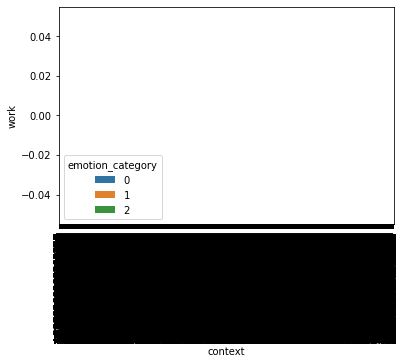

In [ ]:
sea.barplot(x="context", y="work",hue="emotion_category", data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

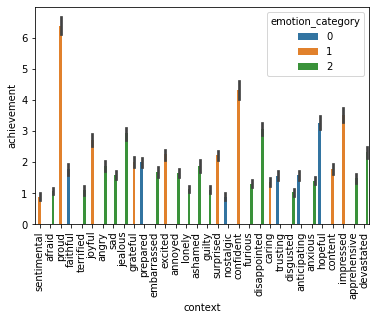

In [ ]:
sea.barplot(x="context", y="achievement", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

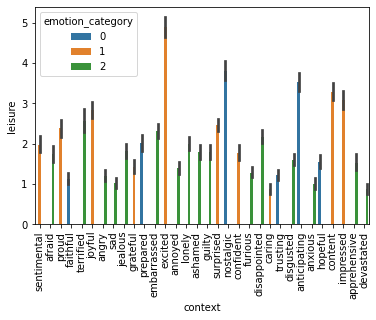

In [ ]:
sea.barplot(x="context", y="leisure", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

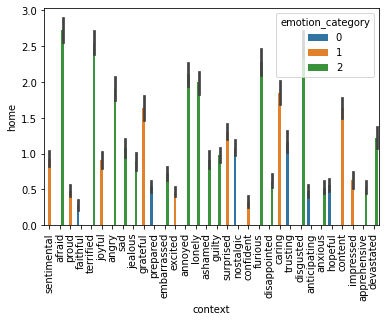

In [ ]:
sea.barplot(x="context", y="home", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

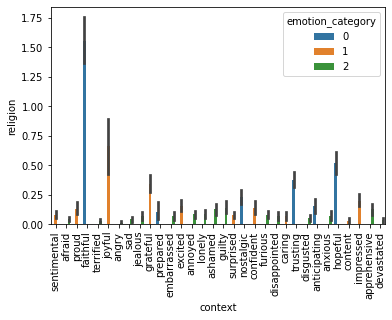

In [ ]:
sea.barplot(x="context", y="religion", hue="emotion_category",data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

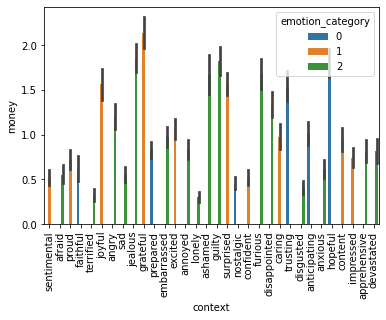

In [ ]:
sea.barplot(x="context", y="money", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

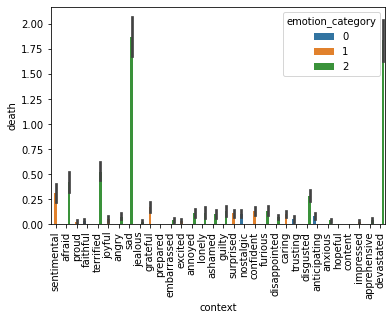

In [ ]:
sea.barplot(x="context", y="death", hue="emotion_category",data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

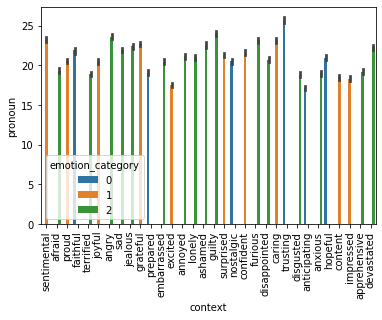

In [ ]:
sea.barplot(x="context", y="pronoun", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

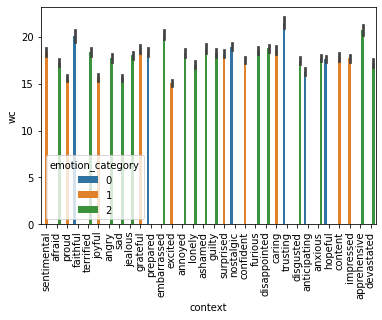

In [ ]:
sea.barplot(x="context", y="wc",hue="emotion_category", data=train)
plt.xticks(rotation = 90)

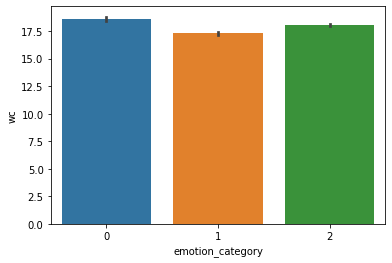

In [ ]:
sea.barplot(x="emotion_category", y="wc", data=train)

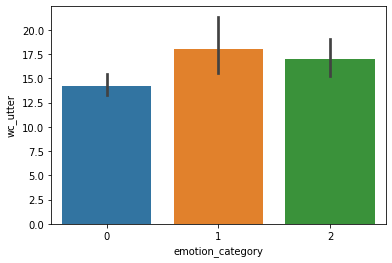

In [ ]:
sea.barplot(x="emotion_category", y="wc_utter", data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

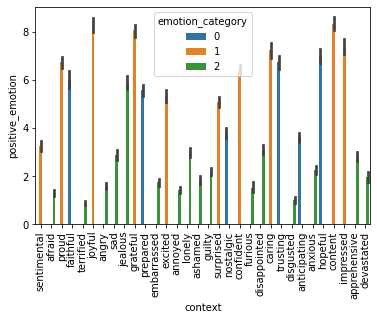

In [ ]:
sea.barplot(x="context", y="positive_emotion", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

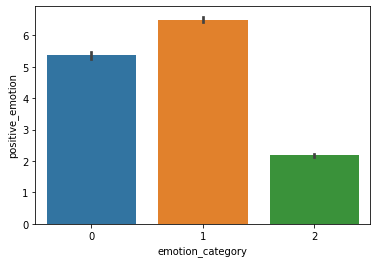

In [ ]:

sea.barplot(x="emotion_category", y="positive_emotion", data=train)

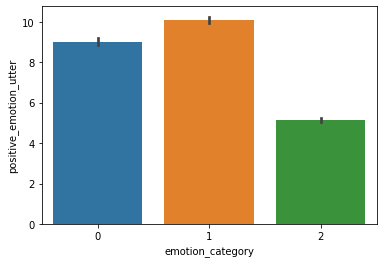

In [ ]:
sea.barplot(x="emotion_category", y="positive_emotion_utter", data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

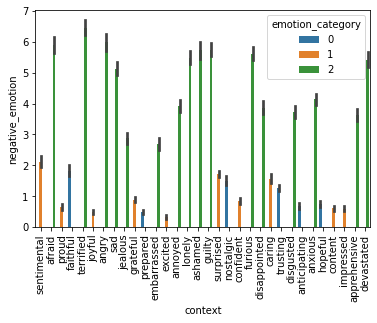

In [ ]:
sea.barplot(x="context", y="negative_emotion", hue="emotion_category", data=train)
plt.xticks(rotation = 90)

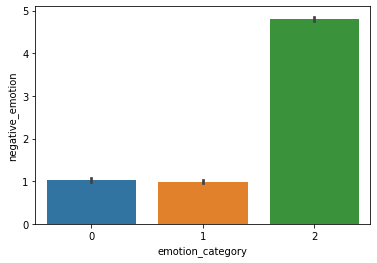

In [ ]:
sea.barplot(x="emotion_category", y="negative_emotion", data=train)

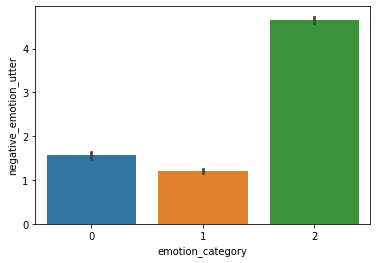

In [ ]:
sea.barplot(x="emotion_category", y="negative_emotion_utter", data=train)

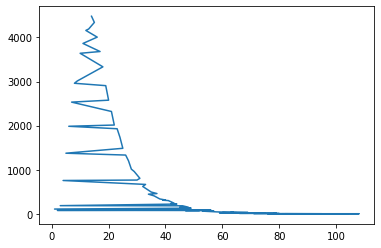

In [ ]:
train["wc"].value_counts().plot()

In [ ]:
train['context'].value_counts()

surprised       3956
excited         2935
angry           2740
proud           2719
annoyed         2642
sad             2634
afraid          2510
lonely          2503
grateful        2487
terrified       2487
guilty          2463
anxious         2456
disgusted       2447
confident       2440
anticipating    2439
hopeful         2404
furious         2394
impressed       2381
disappointed    2356
nostalgic       2350
joyful          2346
jealous         2329
prepared        2292
content         2214
devastated      2192
embarrassed     2191
sentimental     2073
caring          2054
trusting        2001
ashamed         1976
apprehensive    1822
faithful        1435
Name: context, dtype: int64

In [ ]:
valid['context'].value_counts()

surprised       336
annoyed         282
impressed       231
sad             229
excited         225
embarrassed     218
prepared        217
lonely          217
disappointed    215
confident       212
afraid          207
jealous         202
content         199
angry           196
joyful          192
terrified       190
sentimental     189
hopeful         188
disgusted       187
proud           187
anxious         183
furious         179
nostalgic       179
apprehensive    174
devastated      174
grateful        172
anticipating    171
trusting        170
caring          165
guilty          161
ashamed         159
faithful        112
Name: context, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


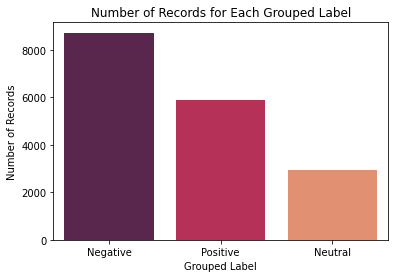

In [ ]:
sea.countplot("emotion_category", data=train, order=train["emotion_category"].value_counts().index, palette="rocket")
plt.title("Number of Records for Each Grouped Label")
plt.xticks([2, 1, 0], [ "Neutral","Positive", "Negative"])
plt.ylabel("Number of Records")
plt.xlabel("Grouped Label")
plt.savefig("grouped_label.png")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


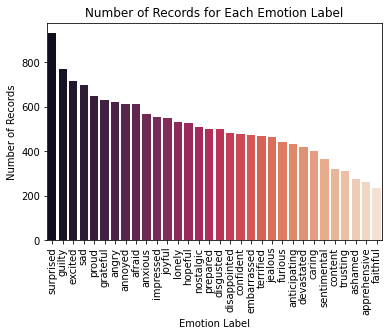

In [ ]:
ax =sea.countplot("context", data=train, order=train["context"].value_counts().index,  palette="rocket")
#ax.set_xticklabels(train['context'], rotation=90, ha='right')
plt.xticks(rotation=90)
plt.title("Number of Records for Each Emotion Label")
plt.ylabel("Number of Records")
plt.xlabel("Emotion Label")
plt.savefig("value_counts.png")
plt.savefig("Fig.png", bbox_inches='tight')
#files.download("Fid.png")

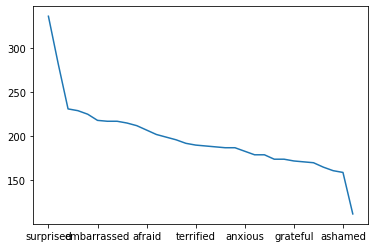

In [ ]:
valid["utterances"].value_counts().plot()

#Text Cleaning (removing comma and lowering all text

In [ ]:
def clean_text(dataset, column_to_clean):
  text = []
  for prompt in dataset[column_to_clean]: 
    if "_comma_" in prompt: 
      prompt = prompt.replace("_comma_", "")
    text.append(prompt.lower())
  return text

In [ ]:
train["clean_prompt"] = clean_text(train, "prompt")
valid["clean_prompt"] = clean_text(valid, "prompt")
test["clean_prompt"] = clean_text(test, "prompt")

train["clean_utterance"] = clean_text(train, "utterance")
valid["clean_utterance"] = clean_text(valid, "utterance")
test["clean_utterance"] = clean_text(test, "utterance")


#Adding in Speaker/Listener Column 
 - Creating new dataframes that are either listener or speaker

In [ ]:
 def add_speaker_listener_column(empath_df):
    speaker_listener =[]
    collect_convos = {}
    for n, conv_id in enumerate(empath_df["conv_id"]): 
      #for first instance of conversation id we assign to speaker
      if conv_id not in collect_convos:
        collect_convos[conv_id] = {"listener":[], "speaker":[]}
        collect_convos[conv_id]["speaker"].append(empath_df.iloc[[n]])
        speaker_listener.append("speaker")
        prev_check = "listen"
      # print(empath_df.iloc[[n]], n)
      #second instance would go into else statement and be list since after the first instance 
        # we set prev as listen 
          #then it'll continue to loop back and forth until the next convo 
      else:
        if prev_check == "listen":
          collect_convos[conv_id]["listener"].append(empath_df.iloc[[n]])
          speaker_listener.append("listener")
          prev_check = "speak"
        # print(empath_df.iloc[[n]], n)
        else: 
          collect_convos[conv_id]["speaker"].append(empath_df.iloc[[n]])
          speaker_listener.append("speaker")
          prev_check = "listen"
          #print(empath_df.iloc[[n]], n)
    return speaker_listener

In [ ]:
#adding in speaker and listener column so we can differentiate text
train["speaker_label"] = add_speaker_listener_column(train)
valid["speaker_label"] = add_speaker_listener_column(valid)
test["speaker_label"] = add_speaker_listener_column(test)

In [ ]:
train_speaker = train.loc[train["speaker_label"] == "speaker"]
train_listener = train.loc[train["speaker_label"] == "listener"]

valid_speaker = valid.loc[valid["speaker_label"] == "speaker"]
valid_listener = valid.loc[valid["speaker_label"] == "listener"]

test_speaker = test.loc[test["speaker_label"] == "speaker"]
test_listener = test.loc[test["speaker_label"] == "listener"]

#Adding in New Emotion Labels (Positive Negative Neutral Groups)




In [ ]:
negative_emotions = ['afraid','angry','annoyed','anxious','apprehensive','ashamed','devastated','disappointed','disgusted','embarrassed','furious','guilty','jealous','lonely','sad','terrified']
neutral_emotions = ['anticipating','faithful','hopeful','nostalgic','prepared','trusting']
positive_emotions = ['caring','confident','content','excited','grateful','impressed','joyful','proud','sentimental','surprised']

In [ ]:
def reducer(emotion):
  if emotion in negative_emotions:
    return 2
  if emotion in neutral_emotions:
    return 0
  if emotion in positive_emotions:
    return 1

In [ ]:
train['emotion_category'] = train['context'].apply(lambda emotion: reducer(emotion))
valid['emotion_category'] = valid['context'].apply(lambda emotion: reducer(emotion))
test['emotion_category'] = test['context'].apply(lambda emotion: reducer(emotion))

#Building an MLP Model

##Feature Builder Class

In [6]:
# We'll be using SkLearn's TfIdfVectorizer to construct our n-gram feature vectors

# We'll create our custom sequencer class for converting a text into a sequence of integers corresponding to our tokens
class Sequencer(object):
    def __init__(self, corpus, bos_token='<s>', eos_token='</s>', unk_token='<unk>', pad_token='<pad>'):
        self.word2idx = {}
        self.idx2word = {}

        self.unk_index = self.add_token(unk_token) 
        self.pad_index = self.add_token(pad_token)
        self.bos_index = self.add_token(bos_token)
        self.eos_index = self.add_token(eos_token)
        self.nlp = spacy.load('en')
        self.tokenizer = lambda text: [t.text for t in self.nlp(text)]

    def add_token(self, token):

        self.word2idx[token] = new_index = len(self.word2idx)
        self.idx2word[new_index] = token

        return new_index

    def encode(self, text):
        # Input will look like:
        # [<s>, w1, w2, ..., wn, </s>]
        tokens = self.tokenizer(text)

        sequence = [self.bos_index]
        for token in tokens:

            index = self.word2idx.get(token, self.unk_index)
            sequence.append(index)
        sequence.append(self.eos_index)

        return sequence

    def create_padded_tensor(self, sequences):
        # Given a list of sequences, pad all to the same length

        max_seq_len = max(len(sequence) for sequence in sequences)
        tensor = torch.full((len(sequences), max_seq_len), self.pad_index, dtype=torch.long)

        for i, sequence in enumerate(sequences):
            for j, token in enumerate(sequence):
                tensor[i][j] = token
        
        return tensor

class W2VSequencer(object):
    def __init__(self, gensim_w2v):
        self.nlp = spacy.load('en')
        self.w2v = gensim_w2v
        self.w2v.add(['<unk>'], [np.random.uniform(low=-1, high=1.0, size=(300,))])

        self.unk_index = self.w2v.vocab.get('<unk>')
        self.tokenizer = lambda text: [t.text for t in self.nlp(text)]

    def encode(self, text):
        # Input will look like:
        # [<s>, w1, w2, ..., wn, </s>]
        sequence = []
        tokens = self.tokenizer(text)
        for token in tokens:

            index = self.w2v.vocab.get(token, self.unk_index).index
            sequence.append(index)

        return sequence

    def create_padded_tensor(self, sequences):
        # Given a list of sequences, pad all to the same length

        max_seq_len = max(len(sequence) for sequence in sequences)
        tensor = torch.full((len(sequences), max_seq_len), 0, dtype=torch.long)

        for i, sequence in enumerate(sequences):
            for j, token in enumerate(sequence):
                tensor[i][j] = token
        
        return tensor

# For converting labels into indices
class LabelIndexer(object):
    def __init__(self, labels):
        self.label2idx = {label: i for i, label in enumerate(labels)}
        self.idx2label = {i:label for label, i in self.label2idx.items()}
        self.labels = labels

    def encode(self, y):
        return self.label2idx[y]

    def encode_batch(self, ys):
        return torch.LongTensor([self.encode(y) for y in ys])


## Dataset class

In [7]:
class EmpatheticDataset(Dataset):
    def __init__(self, texts, labels, input_transformer, output_transformer):
        self.texts = texts
        self.labels = labels
        self.input_transformer = input_transformer
        self.output_transformer = output_transformer

    def __getitem__(self, index): # Return a single example
        text = self.texts[index]
        label = self.labels[index]
        x = self.input_transformer(text)
        y = self.output_transformer(label)
        
        return x, y

    def __len__(self):
        return len(self.texts)

## Models

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(input_size, output_size, bias=True) # y = Wx + b

    def forward(self, x):
        return self.fc(x) # Compute y = Wx + b

class MultiLayerPerceptron(nn.Module):
    """
    At its simplest, a multilayer perceptron is a 2 layer network
    """

    def __init__(self, input_size, hidden_size, output_size, dropout=False, dropout_p=0.1):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)

        self.add_dropout = dropout
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, x):
        h = F.relu(self.fc1(x))
        if self.add_dropout:
            logits = self.fc2(self.dropout(h))
        else:
            logits = self.fc2(h)

        return logits
    

class TextConvolver(nn.Module):
    """
    This model is based on "Convolutional Neural Networks for Sentence Classification" 
    described here (Kim 2014):
    https://arxiv.org/pdf/1408.5882.pdf

    I modified the implemenation defined here:
    https://github.com/Shawn1993/cnn-text-classification-pytorch/blob/master/model.py

    The contributors use 2D Cnns with kernel size (1 x K), but we can replace
    those with 1D convolutions with kernel size K.

    Additionally, we use pretrained word embeddings (English Wikipedia skip-gram)
    for our prediction, unlike the original paper which uses Word2Vec 
    100 billion words.
    """
    def __init__(self, input_size, output_size, kernel_sizes, channel_size=32, dropout=False, dropout_p=0.1, w2v_weights=None):
        super(TextConvolver, self).__init__()

        self.embedding = nn.Embedding.from_pretrained(w2v_weights)
        embed_dim = 300

        self.frozen_embedding = nn.Embedding.from_pretrained(w2v_weights)
        self.frozen_embedding.requires_grad = False # Disable gradient updates


        self.add_dropout = dropout
        self.dropout = nn.Dropout(dropout_p)

        # Define an iterable set of parallel layers which are given the same input
        self.convs = nn.ModuleList([nn.Conv1d(2 * embed_dim, channel_size, kernel_size) for kernel_size in kernel_sizes])

        self.fc = nn.Linear(len(kernel_sizes) * channel_size, output_size)



    def forward(self, x):
        # x size: [batch_size, seq_len]

        embed = self.embedding(x).transpose(1, 2)
        embed_frozen = self.frozen_embedding(x).transpose(1, 2)
        # embed/embed_frozen shape: [batch_size, embed_dim, seq_len]

        combined_embedding = torch.cat((embed, embed_frozen), dim=1)
        # combined_embedding shape: [batch_size, 2*embed_dim, seq_len]

        convs = [F.relu(conv(combined_embedding)) for conv in self.convs]
        # [num_filters, (batch_size, out_dim, seq_len)]

        maxs = [F.max_pool1d(conv_out, conv_out.shape[2]).squeeze(2) for conv_out in convs] # Max pool across time
        # After max pooling: [num_filters, (batch_size, channel_size, 1)]
        # After squeezing: [num_filters, (batch_size, channel_size)]

        flattened_maxs = torch.cat(maxs, dim=1)
        # [batch_size, num_filters * channel_size]


        # logits shape: [batch_size, output_size]
        logits = self.fc(self.dropout(flattened_maxs))

        return logits

## Trainer Class

In [9]:
class MultiClassTrainer(object):
    """
    Trainer for training a multi-class classification model
    """

    def __init__(self, model, optimizer, loss_fn, device="cpu", log_every_n=None):
        self.model = model.to(device)
        self.optimizer = optimizer
        self.device = device
        self.loss_fn = loss_fn
        
        self.log_every_n = log_every_n if log_every_n else 0


    def _print_summary(self):
        print(self.model)
        print(self.optimizer)
        print(self.loss_fn)

    def train(self, loader):
        """
        Run a single epoch of training
        """

        self.model.train() # Run model in training mode

        loss_history = []
        running_loss = 0.
        running_loss_history = []

        for i, batch in tqdm(enumerate(loader)):
            batch_size = batch[0].shape[0]
            self.optimizer.zero_grad() # Always set gradient to 0 before computing it

            logits = self.model(batch[0].to(self.device)) # Forward pass, # Wx + b
            #print(logits)
            #print(batch[1].view(-1).to(self.device))
            loss = self.loss_fn(logits, batch[1].view(-1).to(self.device)) # Compute loss: Cross entropy loss

            loss_history.append(loss.item())

            

            running_loss += (loss_history[-1] - running_loss) / (i + 1) # Compute rolling average

            if self.log_every_n and i % self.log_every_n == 0:
                print("Running loss: ", running_loss)

            running_loss_history.append(running_loss)

            loss.backward() # Perform backprop, which will compute dL/dw

            nn.utils.clip_grad_norm_(self.model.parameters(), 3.0)
            self.optimizer.step() # Update step: w = w - eta * dL / dW

        print("Epoch completed!")
        print("Epoch Loss: ", running_loss)
        print("Epoch Perplexity: ", math.exp(running_loss))

        # The history information can allow us to draw a loss plot
        return loss_history, running_loss_history

    def evaluate(self, loader, labels):
        """
        Evaluate the model on a validation set
        """

        self.model.eval() # Run model in eval mode (disables dropout layer)

        batch_wise_true_labels = []
        batch_wise_predictions = []

        loss_history = []
        running_loss = 0.
        running_loss_history = []

        with torch.no_grad(): # Disable gradient computation - required only during training
            for i, batch in tqdm(enumerate(loader)):
                # batch[0] shape: (batch_size, input_size)

                logits = self.model(batch[0].to(self.device)) # Run forward pass (except we don't store gradients)
                # logits shape: (batch_size, num_classes)
                
                loss = self.loss_fn(logits, batch[1].view(-1).to(self.device)) # Compute loss
                # No backprop is done during validation
                loss_history.append(loss.item())

                running_loss += (loss_history[-1] - running_loss) / (i + 1) # Compute rolling average
                
                running_loss_history.append(running_loss)

                # Converts the raw outputs into probabilities for each class using softmax
                probs = F.softmax(logits, dim=-1) 
                # probs shape: (batch_size, num_classes)

                predictions = torch.argmax(probs, dim=-1) # Output predictions
                # predictions shape: (batch_size)

                batch_wise_true_labels.append(batch[1].tolist())
                batch_wise_predictions.append(predictions.tolist())
        
        # flatten the list of predictions using itertools
        all_true_labels = list(chain.from_iterable(batch_wise_true_labels))
        all_predictions = list(chain.from_iterable(batch_wise_predictions))

        # Now we can generate a classification report
        print("Classification report after epoch:")
        print(classification_report(all_true_labels, all_predictions))
        print(confusion_matrix(all_true_labels,all_predictions))
        return loss_history, running_loss_history

    def get_model_dict(self):
        return self.model.state_dict()

    def run_training(self, train_loader, valid_loader, labels, n_epochs=10):
        # Useful for us to review what experiment we're running
        # Normally, you'd want to save this to a file
        self._print_summary()

        train_losses = []
        train_running_losses = []

        valid_losses = []
        valid_running_losses = []

        for i in range(n_epochs):
            loss_history, running_loss_history = self.train(train_loader)
            valid_loss_history, valid_running_loss_history = self.evaluate(valid_loader, labels)

            train_losses.append(loss_history)
            train_running_losses.append(running_loss_history)

            valid_losses.append(valid_loss_history)
            valid_running_losses.append(valid_running_loss_history)

        # Training done, let's look at the loss curves
        all_train_losses = list(chain.from_iterable(train_losses))
        all_train_running_losses = list(chain.from_iterable(train_running_losses))

        all_valid_losses = list(chain.from_iterable(valid_losses))
        all_valid_running_losses = list(chain.from_iterable(valid_running_losses))

        train_epoch_idx = range(len(all_train_losses))
        valid_epoch_idx = range(len(all_valid_losses))
        # sns.lineplot(epoch_idx, all_losses)
        sns.lineplot(train_epoch_idx, all_train_running_losses)
        sns.lineplot(valid_epoch_idx, all_valid_running_losses)
        plt.show()

##Feature Engineering

In [ ]:
#initial import of file and loading of dictionary which is needed for the script
import word_category_counter as wc
wc.load_dictionary("LIWC2007.dic")

def add_liwc_categories(data, text_column):
  _liwc_categories = [
          ('Total Function Words', 1, 'funct', None, None),
          ('Total Pronouns', 2, 'pronoun', 1, 'pronoun'),
          ('Personal Pronouns', 3, 'ppron', None, None),
          ('First Person Singular', 4, 'i', 2, 'i'),
          ('First Person Plural', 5, 'we', 3, 'we'),
          ('Second Person', 6, 'you', 5, 'you'),
          ('Third Person Singular', 7, 'shehe', None, None),
          ('Third Person Plural', 8, 'they', None, None),
          (' Impersonal Pronouns', 9, 'ipron', None, None),
          ('Articles', 10, 'article', 9, 'article'),
          ('Common Verbs', 11, 'verb', None, None),
          ('Auxiliary Verbs', 12, 'auxverb', None, None),
          ('Past Tense', 13, 'past', 38, 'past'),
          ('Present Tense', 14, 'present', 39, 'present'),
          ('Future Tense', 15, 'future', 40, 'future'),
          ('Adverbs', 16, 'adverb', None, None),
          ('Prepositions', 17, 'preps', 10, 'preps'),
          ('Conjunctions', 18, 'conj', None, None),
          ('Negations', 19, 'negate', 7, 'negate'),
          ('Quantifiers', 20, 'quant', None, None),
          ('Number', 21, 'number', 11, 'number'),
          ('Swear Words', 22, 'swear', 66, 'swear'),
          ('Social Processes', 121, 'social', 31, 'social'),
          ('Family', 122, 'family', 35, 'family'),
          ('Friends', 123, 'friend', 34, 'friends'),
          ('Humans', 124, 'humans', 36, 'humans'),
          ('Affective Processes', 125, 'affect', 12, 'affect'),
          ('Positive Emotion', 126, 'posemo', 13, 'posemo'),
          ('Negative Emotion', 127, 'negemo', 16, 'negemo'),
          ('Anxiety', 128, 'anx', 17, 'anx'),
          ('Anger', 129, 'anger', 18, 'anger'),
          ('Sadness', 130, 'sad', 19, 'sad'),
          ('Cognitive Processes', 131, 'cogmech', 20, 'cogmech'),
          ('Insight', 132, 'insight', 22, 'insight'),
          ('Causation', 133, 'cause', 21, 'cause'),
          ('Discrepancy', 134, 'discrep', 23, 'discrep'),
          ('Tentative', 135, 'tentat', 25, 'tentat'),
          ('Certainty', 136, 'certain', 26, 'certain'),
          ('Inhibition', 137, 'inhib', 24, 'inhib'),
          ('Inclusive', 138, 'incl', 44, 'incl'),
          ('Exclusive', 139, 'excl', 45, 'excl'),
          ('Perceptual Processes', 140, 'percept', 27, 'senses'),
          ('See', 141, 'see', 28, 'see'),
          ('Hear', 142, 'hear', 29, 'hear'),
          ('Feel', 143, 'feel', 30, 'feel'),
          ('Biological Processes', 146, 'bio', None, None),
          ('Body', 147, 'body', 61, 'body'),
          ('Health', 148, 'health', None, None),
          ('Sexual', 149, 'sexual', 62, 'sexual'),
          ('Ingestion', 150, 'ingest', 63, 'eating'),
          ('Relativity', 250, 'relativ', None, None),
          ('Motion', 251, 'motion', 46, 'motion'),
          ('Space', 252, 'space', 41, 'space'),
          ('Time', 253, 'time', 37, 'time'),
          ('Work', 354, 'work', 49, 'job'),
          ('Achievement', 355, 'achieve', 50, 'achieve'),
          ('Leisure', 356, 'leisure', 51, 'leisure'),
          ('Home', 357, 'home', 52, 'home'),
          ('Money', 358, 'money', 56, 'money'),
          ('Religion', 359, 'relig', 58, 'relig'),
          ('Death', 360, 'death', 59, 'death'),
          ('Assent', 462, 'assent', 8, 'assent'),
          ('Nonfluencies', 463, 'nonfl', 67, 'nonfl'),
          ('Fillers', 464, 'filler', 68, 'fillers'),
          ('Total first person', None, None, 4, 'self'),
          ('Total third person', None, None, 6, 'other'),
          ('Positive feelings', None, None, 14, 'posfeel'),
          ('Optimism and energy', None, None, 15, 'optim'),
          ('Communication', None, None, 32, 'comm'),
          ('Other references to people', None, None, 33, 'othref'),
          ('Up', None, None, 42, 'up'),
          ('Down', None, None, 43, 'down'),
          ('Occupation', None, None, 47, 'occup'),
          ('School', None, None, 48, 'school'),
          ('Sports', None, None, 53, 'sports'),
          ('TV', None, None, 54, 'tv'),
          ('Music', None, None, 55, 'music'),
          ('Metaphysical issues', None, None, 57, 'metaph'),
          ('Physical states and functions', None, None, 60, 'physcal'),
          ('Sleeping', None, None, 64, 'sleep'),
          ('Grooming', None, None, 65, 'groom')]
  for i in _liwc_categories: 
    long_cat = i[0]
    data[long_cat] = data.apply(lambda x: wc.score_text(str(x[text_column])).get(long_cat, 0), axis=1)
  return data



ModuleNotFoundError: ignored

In [ ]:
train = add_liwc_categories(train, "clean_prompt")
valid = add_liwc_categories(valid, "clean_prompt")
test = add_liwc_categories(test, "clean_prompt")

In [ ]:
train.to_csv("train_added_columns.csv", index=False)
valid.to_csv("valid_added_columns.csv", index=False)
test.to_csv("test_added_columns.csv", index=False)

## Data Preparation

In [10]:
def convert_column(dataset, column): 
   texts = [text for text in dataset[column]]
  #  for text in dataset[column]:
  #    print(text)
   texts = (*texts,)
   return texts


In [ ]:
print(len(valid["clean_prompt"]))
train = train.drop_duplicates(subset=['clean_prompt'])
valid = valid.drop_duplicates(subset=['clean_prompt'])
#test = test.drop_duplicates(subset=['clean_prompt'])
print(len(valid["clean_prompt"]))

6318
2748


In [ ]:

g = train.groupby('context')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
print(g)

In [98]:
listener_train = train.loc[train["speaker_label"] == "listener"]
speaker_train = train.loc[train["speaker_label"] == "speaker"]

listener_valid = train.loc[train["speaker_label"] == "listener"]
speaker_valid = train.loc[valid["speaker_label"] == "speaker"]

listener_test = train.loc[train["speaker_label"] == "listener"]
speaker_test = train.loc[train["speaker_label"] == "speaker"]

In [73]:
#Potential Labels
train_context_labels = convert_column(train, "context")
train_grouped_labels = convert_column(train, "emotion_category")
valid_context_labels = convert_column(valid, "context")
valid_grouped_labels = convert_column(valid, "emotion_category")
test_context_labels = convert_column(test, "context")
test_grouped_labels = convert_column(test, "emotion_category")
print(train_grouped_labels)
#Potential X Labels
train_prompt = convert_column(train, "clean_prompt")
train_utterance = convert_column(train, "clean_utterance")
valid_prompt = convert_column(valid, "clean_prompt")
valid_utterance = convert_column(valid, "clean_utterance")
test_prompt = convert_column(test, "clean_prompt")
test_utterance = convert_column(test, "clean_utterance")
type(train_prompt+train_utterance)


(1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 

tuple

In [17]:
print(train_utterance)

('i remember going to see the fireworks with my best friend. it was the first time we ever spent time alone together. although there was a lot of people we felt like the only people in the world.', 'was this a friend you were in love with or just a best friend?', 'this was a best friend. i miss her.', 'where has she gone?', 'we no longer talk.', 'oh was this something that happened because of an argument?', ' it feels like hitting to blank wall when i see the darkness', "oh ya? i don't really see how", 'dont you feel so.. its a wonder ', 'i do actually hit blank walls a lot of times but i get by', ' i virtually thought so.. and i used to get sweatings', 'wait what are sweatings', 'hi how are you doing today', 'doing good.. how about you', 'im good trying to understand how someone can feel like hitting a blank wall when they see the darkness', "it's quite strange that you didnt imagine it", 'i dont imagine feeling a lot maybe your on to something', 'i have never cheated on my wife.', 'a

In [79]:
class EmpatheticDataset(Dataset):
    def __init__(self, texts, liwc, labels, input_transformer, output_transformer):
        self.texts = texts
       # self.texts2 = texts2
        self.labels = labels
        self.liwc  = liwc.values
        self.input_transformer = input_transformer
        self.output_transformer = output_transformer

    def __getitem__(self, index): # Return a single example
        text = self.texts[index]
      #  text2 = self.texts2[index]
        label = self.labels[index]
        liwc = self.liwc[index]
        x_liwc = torch.tensor(liwc)
        x = self.input_transformer(text)
        y = self.output_transformer(label)       
        return x_liwc.float(), y

    def __len__(self):
        return len(self.texts)

In [64]:

g = train.groupby('context')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
print(g)

                            conv_id  utterance_idx  ... Sleeping Grooming
context                                             ...                  
afraid   0        hit:731_conv:1463              3  ...        0        0
         1      hit:6985_conv:13971              1  ...        0        0
         2       hit:2913_conv:5826              3  ...        0        0
         3      hit:9771_conv:19543              4  ...        0        0
         4       hit:3372_conv:6744              3  ...        0        0
...                             ...            ...  ...      ...      ...
trusting 1430    hit:3296_conv:6593              4  ...        0        0
         1431  hit:11718_conv:23437              4  ...        0        0
         1432  hit:11608_conv:23216              3  ...        0        0
         1433  hit:11119_conv:22238              4  ...        0        0
         1434    hit:4577_conv:9155              1  ...        0        0

[45920 rows x 102 columns]


In [ ]:
['Total Function Words', 'Total Pronouns', 'Personal Pronouns', 'First Person Singular', 'First Person Plural', 'Second Person', 'Third Person Singular', 'Third Person Plural', ' Impersonal Pronouns', 'Articles', 'Common Verbs', 'Auxiliary Verbs', 'Past Tense', 'Present Tense', 'Future Tense', 'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers', 'Number', 'Swear Words', 'Social Processes', 'Family', 'Friends', 'Humans', 'Affective Processes', 'Positive Emotion', 'Negative Emotion', 'Anxiety', 'Anger', 'Sadness', 'Cognitive Processes', 'Insight', 'Causation', 'Discrepancy', 'Tentative', 'Certainty', 'Inhibition', 'Inclusive', 'Exclusive', 'Perceptual Processes', 'See', 'Hear', 'Feel', 'Biological Processes', 'Body', 'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space', 'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion', 'Death', 'Assent', 'Nonfluencies', 'Fillers', 'Total first person', 'Total third person', 'Positive feelings', 'Optimism and energy', 'Communication', 'Other references to people', 'Up', 'Down', 'Occupation', 'School', 'Sports', 'TV', 'Music', 'Metaphysical issues', 'Physical states and functions', 'Sleeping', 'Grooming']

In [75]:
train_liwc = train[['Total Function Words', 'Total Pronouns', 'Personal Pronouns', 'First Person Singular', 'First Person Plural', 'Second Person', 'Third Person Singular', 'Third Person Plural', ' Impersonal Pronouns', 'Articles', 'Common Verbs', 'Auxiliary Verbs', 'Past Tense', 'Present Tense', 'Future Tense', 'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers', 'Number', 'Swear Words', 'Social Processes', 'Family', 'Friends', 'Humans', 'Affective Processes', 'Positive Emotion', 'Negative Emotion', 'Anxiety', 'Anger', 'Sadness', 'Cognitive Processes', 'Insight', 'Causation', 'Discrepancy', 'Tentative', 'Certainty', 'Inhibition', 'Inclusive', 'Exclusive', 'Perceptual Processes', 'See', 'Hear', 'Feel', 'Biological Processes', 'Body', 'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space', 'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion', 'Death', 'Assent', 'Nonfluencies', 'Fillers', 'Total first person', 'Total third person', 'Positive feelings', 'Optimism and energy', 'Communication', 'Other references to people', 'Up', 'Down', 'Occupation', 'School', 'Sports', 'TV', 'Music', 'Metaphysical issues', 'Physical states and functions', 'Sleeping', 'Grooming']]
valid_liwc = valid[['Total Function Words', 'Total Pronouns', 'Personal Pronouns', 'First Person Singular', 'First Person Plural', 'Second Person', 'Third Person Singular', 'Third Person Plural', ' Impersonal Pronouns', 'Articles', 'Common Verbs', 'Auxiliary Verbs', 'Past Tense', 'Present Tense', 'Future Tense', 'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers', 'Number', 'Swear Words', 'Social Processes', 'Family', 'Friends', 'Humans', 'Affective Processes', 'Positive Emotion', 'Negative Emotion', 'Anxiety', 'Anger', 'Sadness', 'Cognitive Processes', 'Insight', 'Causation', 'Discrepancy', 'Tentative', 'Certainty', 'Inhibition', 'Inclusive', 'Exclusive', 'Perceptual Processes', 'See', 'Hear', 'Feel', 'Biological Processes', 'Body', 'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space', 'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion', 'Death', 'Assent', 'Nonfluencies', 'Fillers', 'Total first person', 'Total third person', 'Positive feelings', 'Optimism and energy', 'Communication', 'Other references to people', 'Up', 'Down', 'Occupation', 'School', 'Sports', 'TV', 'Music', 'Metaphysical issues', 'Physical states and functions', 'Sleeping', 'Grooming']]
test_liwc = test[['Total Function Words', 'Total Pronouns', 'Personal Pronouns', 'First Person Singular', 'First Person Plural', 'Second Person', 'Third Person Singular', 'Third Person Plural', ' Impersonal Pronouns', 'Articles', 'Common Verbs', 'Auxiliary Verbs', 'Past Tense', 'Present Tense', 'Future Tense', 'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers', 'Number', 'Swear Words', 'Social Processes', 'Family', 'Friends', 'Humans', 'Affective Processes', 'Positive Emotion', 'Negative Emotion', 'Anxiety', 'Anger', 'Sadness', 'Cognitive Processes', 'Insight', 'Causation', 'Discrepancy', 'Tentative', 'Certainty', 'Inhibition', 'Inclusive', 'Exclusive', 'Perceptual Processes', 'See', 'Hear', 'Feel', 'Biological Processes', 'Body', 'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space', 'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion', 'Death', 'Assent', 'Nonfluencies', 'Fillers', 'Total first person', 'Total third person', 'Positive feelings', 'Optimism and energy', 'Communication', 'Other references to people', 'Up', 'Down', 'Occupation', 'School', 'Sports', 'TV', 'Music', 'Metaphysical issues', 'Physical states and functions', 'Sleeping', 'Grooming']]

#just 81 liwc categories does poorly 

#removing 'Total first person', 'Total third person', 'Positive feelings', 'Optimism and energy', 'Communication', 'Other references to people', 'Up', 'Down', 'Occupation', 'School', 'Sports', 'TV', 'Music', 'Metaphysical issues', 'Physical states and functions', 'Sleeping', 'Grooming'


#LIWC groupings on 32 labels
#positve, neg, and wc we get same results
#positive, neg about the same
print(len(train_liwc.columns))

81


In [96]:
tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(train_prompt)
input_transformer = lambda text: torch.FloatTensor(tfidf_vec.transform([text]).todense()).squeeze(0)

label_indexer = LabelIndexer(list(set(train_context_labels +valid_context_labels)))
output_transformer = lambda label: torch.LongTensor([label_indexer.encode(label)])

train_tfidf_dataset = EmpatheticDataset(train_prompt, train_liwc, train_context_labels, input_transformer, output_transformer)
valid_tfidf_dataset = EmpatheticDataset(valid_prompt, valid_liwc,  valid_context_labels, input_transformer, output_transformer)
test_tfidf_dataset = EmpatheticDataset(test_prompt, test_liwc, test_context_labels, input_transformer, output_transformer)

train_tfidf_loader = torch.utils.data.DataLoader(train_tfidf_dataset, batch_size=16, shuffle=True)
valid_tfidf_loader = torch.utils.data.DataLoader(valid_tfidf_dataset, batch_size=16, shuffle=True)
test_tfidf_loader = torch.utils.data.DataLoader(test_tfidf_dataset, batch_size=16, shuffle=True)
# train_sequence_loader = torch.utils.data.DataLoader(train_seq_dataset, batch_size=16)
# valid_sequence_loader = torch.utils.data.DataLoader(valid_seq_dataset, batch_size=16)


## Running Training

In [97]:
# Define our experimental setup; we use the same parameters for both MLP models
input_size =  len(train_liwc.columns) #+ len(tfidf_vec.vocabulary_) #
print(len(tfidf_vec.vocabulary_))
hidden_size = 200 # An arbitrary hyperparameter we define
output_size = len(label_indexer.label2idx)
# Our experimental hyperparameters
# tried -3 (bad), -2 (better), -1 (ooh bad), -4
#all 10 epochs, but may increase -2 because i notice it going up 
LEARNING_RATE = 1e-2

loss_fn = nn.CrossEntropyLoss()

10205


### Plain old MLP

In [27]:
# To print entire confusion matrix
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

MultiLayerPerceptron(
  (fc1): Linear(in_features=81, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=32, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
Adagrad (
Parameter Group 0
    eps: 1e-10
    initial_accumulator_value: 0
    lr: 0.01
    lr_decay: 0
    weight_decay: 0
)
CrossEntropyLoss()



Epoch completed!
Epoch Loss:  2.517114974769801
Epoch Perplexity:  12.392791522829324



Classification report after epoch:
              precision    recall  f1-score   support

           0       0.27      0.38      0.31       218
           1       0.36      0.30      0.33       183
           2       0.33      0.32      0.32       282
           3       0.16      0.15      0.16       207
           4       0.23      0.32      0.27       161
           5       0.35      0.53      0.42       217
           6       0.36      0.07      0.12       112
           7       0.40      0.28      0.33       170
           8       0.25      0.18      0.21       217
           9       0.28      0.47      0.35       212
          10       0.23      0.20      0.21       174
          11       0.02      0.01      0.01       159
          12       0.33      0.32      0.32       202
          13       0.33      0.32      0.32       188
          14       0.17      0.20      0.18       174
          15       0.45      0.36      0.40       199
          16       0.22      0.31      0.25  


Epoch completed!
Epoch Loss:  2.2954307834622396
Epoch Perplexity:  9.928712216184328



Classification report after epoch:
              precision    recall  f1-score   support

           0       0.28      0.32      0.30       218
           1       0.36      0.37      0.37       183
           2       0.35      0.14      0.20       282
           3       0.20      0.17      0.19       207
           4       0.22      0.36      0.27       161
           5       0.40      0.50      0.44       217
           6       0.14      0.09      0.11       112
           7       0.42      0.29      0.34       170
           8       0.23      0.26      0.24       217
           9       0.33      0.45      0.38       212
          10       0.34      0.17      0.22       174
          11       0.02      0.01      0.02       159
          12       0.38      0.33      0.35       202
          13       0.33      0.43      0.37       188
          14       0.19      0.15      0.17       174
          15       0.45      0.40      0.42       199
          16       0.19      0.36      0.25  


Epoch completed!
Epoch Loss:  2.2130074615470536
Epoch Perplexity:  9.143172825954442



Classification report after epoch:
              precision    recall  f1-score   support

           0       0.26      0.49      0.34       218
           1       0.35      0.36      0.36       183
           2       0.33      0.18      0.24       282
           3       0.16      0.06      0.09       207
           4       0.24      0.30      0.27       161
           5       0.39      0.49      0.44       217
           6       0.17      0.14      0.15       112
           7       0.34      0.28      0.31       170
           8       0.18      0.27      0.21       217
           9       0.32      0.37      0.34       212
          10       0.23      0.16      0.18       174
          11       0.00      0.00      0.00       159
          12       0.33      0.34      0.33       202
          13       0.38      0.40      0.39       188
          14       0.17      0.17      0.17       174
          15       0.33      0.42      0.37       199
          16       0.23      0.33      0.27  


Epoch completed!
Epoch Loss:  2.155353440068209
Epoch Perplexity:  8.630940160023112



Classification report after epoch:
              precision    recall  f1-score   support

           0       0.29      0.37      0.32       218
           1       0.39      0.36      0.37       183
           2       0.30      0.19      0.23       282
           3       0.18      0.16      0.17       207
           4       0.24      0.32      0.27       161
           5       0.42      0.48      0.45       217
           6       0.29      0.12      0.17       112
           7       0.40      0.25      0.31       170
           8       0.21      0.27      0.24       217
           9       0.33      0.41      0.36       212
          10       0.27      0.21      0.24       174
          11       0.05      0.04      0.05       159
          12       0.32      0.34      0.33       202
          13       0.33      0.38      0.35       188
          14       0.18      0.16      0.17       174
          15       0.32      0.42      0.36       199
          16       0.21      0.30      0.25  


Epoch completed!
Epoch Loss:  2.111491490186559
Epoch Perplexity:  8.26055263440548



Classification report after epoch:
              precision    recall  f1-score   support

           0       0.28      0.38      0.32       218
           1       0.37      0.34      0.35       183
           2       0.25      0.20      0.22       282
           3       0.22      0.15      0.18       207
           4       0.27      0.30      0.28       161
           5       0.44      0.48      0.46       217
           6       0.31      0.14      0.20       112
           7       0.35      0.26      0.30       170
           8       0.20      0.21      0.20       217
           9       0.37      0.42      0.39       212
          10       0.25      0.24      0.24       174
          11       0.07      0.04      0.05       159
          12       0.33      0.36      0.35       202
          13       0.29      0.38      0.33       188
          14       0.15      0.14      0.15       174
          15       0.39      0.42      0.41       199
          16       0.21      0.26      0.24  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


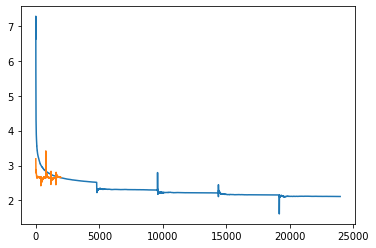

In [92]:
# Model 1: MLP
mlp = MultiLayerPerceptron(input_size, hidden_size, output_size)
#optimizer = optim.SGD(mlp.parameters(), lr=LEARNING_RATE, momentum=0.9)
#optimizer = optim.Adam(mlp.parameters(), lr=LEARNING_RATE)
optimizer = optim.Adagrad(mlp.parameters(), lr=LEARNING_RATE)
mlp_trainer = MultiClassTrainer(mlp, optimizer, loss_fn)
mlp_trainer.run_training(train_tfidf_loader, valid_tfidf_loader, label_indexer.labels, n_epochs=5)

In [94]:
#def evaluate(self, loader, labels):
mlp_trainer.evaluate(test_tfidf_loader, label_indexer.labels)

KeyError: ignored

In [89]:
#def evaluate(self, loader, labels):
mlp_trainer2 = MultiClassTrainer(mlp, optimizer, loss_fn)
mlp_trainer2.evaluate(test_tfidf_loader, label_indexer.labels)

KeyError: ignored